In [1]:
import os
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
import numpy as np 
import re
import warnings
from statsmodels.nonparametric.smoothers_lowess import lowess
from scipy.stats import t
from matplotlib.offsetbox import AnchoredText
from matplotlib.table import Table



# Disable scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

# Set Pandas to display all rows
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [2]:
# Reading Data

In [3]:
# Define the folder path
folder_path = "/Users/vishakkr/Documents/Portfolio/Bellabeat/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/"

# Create a dictionary to store the DataFrames
dataframes = {}

# Load all CSV files in the folder
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

for file in csv_files:
    # Extract the file name without the extension for the key
    file_name = os.path.basename(file).replace(".csv", "")
    # Load the CSV file into a DataFrame
    dataframes[file_name] = pd.read_csv(file)
    print(f"Loaded {file_name} with shape: {dataframes[file_name].shape}")

Loaded minuteIntensitiesWide_merged with shape: (21645, 62)
Loaded dailyActivity_merged with shape: (940, 15)
Loaded sleepDay_merged with shape: (413, 5)
Loaded heartrate_seconds_merged with shape: (2483658, 3)
Loaded minuteIntensitiesNarrow_merged with shape: (1325580, 3)
Loaded minuteMETsNarrow_merged with shape: (1325580, 3)
Loaded hourlySteps_merged with shape: (22099, 3)
Loaded hourlyIntensities_merged with shape: (22099, 4)
Loaded dailyCalories_merged with shape: (940, 3)
Loaded hourlyCalories_merged with shape: (22099, 3)
Loaded minuteSleep_merged with shape: (188521, 4)
Loaded minuteCaloriesNarrow_merged with shape: (1325580, 3)
Loaded dailySteps_merged with shape: (940, 3)
Loaded minuteCaloriesWide_merged with shape: (21645, 62)
Loaded minuteStepsNarrow_merged with shape: (1325580, 3)
Loaded minuteStepsWide_merged with shape: (21645, 62)
Loaded weightLogInfo_merged with shape: (67, 8)
Loaded dailyIntensities_merged with shape: (940, 10)


In [4]:
# Data Preprocessing 

In [5]:
minute_sleep_df=dataframes['minuteSleep_merged']

# Hours data
hourly_calories_df=dataframes['hourlyCalories_merged']
hourly_intensities_df=dataframes['hourlyIntensities_merged']
hourly_steps_df=dataframes['hourlySteps_merged']

# daily data 
daily_activity_df=dataframes['dailyActivity_merged']
daily_calories_df=dataframes['dailyCalories_merged']
daily_steps_df=dataframes['dailySteps_merged']
daily_intensities_df=dataframes['dailyIntensities_merged']
daily_sleep_df=dataframes['sleepDay_merged']
daily_weight_df=dataframes['weightLogInfo_merged']

In [6]:
dataframes_info = {
    "daily_activity_df": daily_activity_df.columns.tolist(),
    "daily_calories_df": daily_calories_df.columns.tolist(),
    "daily_steps_df": daily_steps_df.columns.tolist(),
    "daily_intensities_df": daily_intensities_df.columns.tolist(),
    "daily_sleep_df": daily_sleep_df.columns.tolist(),
    "daily_weight_df": daily_weight_df.columns.tolist(),
}

# Convert the dictionary into a DataFrame for better readability
columns_df = pd.DataFrame.from_dict(dataframes_info, orient='index').transpose()
columns_df


,daily_activity_df,daily_calories_df,daily_steps_df,daily_intensities_df,daily_sleep_df,daily_weight_df
0,Id,Id,Id,Id,Id,Id
1,ActivityDate,ActivityDay,ActivityDay,ActivityDay,SleepDay,Date
2,TotalSteps,Calories,StepTotal,SedentaryMinutes,TotalSleepRecords,WeightKg
3,TotalDistance,None,None,LightlyActiveMinutes,TotalMinutesAsleep,WeightPounds
4,TrackerDistance,None,None,FairlyActiveMinutes,TotalTimeInBed,Fat
5,LoggedActivitiesDistance,None,None,VeryActiveMinutes,None,BMI
6,VeryActiveDistance,None,None,SedentaryActiveDistance,None,IsManualReport
7,ModeratelyActiveDistance,None,None,LightActiveDistance,None,LogId
8,LightActiveDistance,None,None,ModeratelyActiveDistance,None,None
9,SedentaryActiveDistance,None,None,VeryActiveDistance,None,None


In [7]:
# Helper function to convert column names to snake_case
def camel_to_snake(columns):
    return [re.sub(r'(?<!^)(?=[A-Z])', '_', col).lower() for col in columns]

# Assuming all dataframes are stored in a dictionary
dataframes = {
    "daily_activity_df": daily_activity_df,
    "daily_calories_df": daily_calories_df,
    "daily_steps_df": daily_steps_df,
    "daily_intensities_df": daily_intensities_df,
    "daily_sleep_df": daily_sleep_df,
    "daily_weight_df": daily_weight_df,
    "hourly_calories_df": hourly_calories_df,
    "hourly_intensities_df": hourly_intensities_df,
    "hourly_steps_df": hourly_steps_df,
    "minute_sleep_df": minute_sleep_df,
}

# Renaming columns to snake_case
for name, df in dataframes.items():
    df.columns = camel_to_snake(df.columns)

# Display renamed columns
for name, df in dataframes.items():
    print(f"Renamed columns in {name}:")
    print(df.columns.tolist())

Renamed columns in daily_activity_df:
['id', 'activity_date', 'total_steps', 'total_distance', 'tracker_distance', 'logged_activities_distance', 'very_active_distance', 'moderately_active_distance', 'light_active_distance', 'sedentary_active_distance', 'very_active_minutes', 'fairly_active_minutes', 'lightly_active_minutes', 'sedentary_minutes', 'calories']
Renamed columns in daily_calories_df:
['id', 'activity_day', 'calories']
Renamed columns in daily_steps_df:
['id', 'activity_day', 'step_total']
Renamed columns in daily_intensities_df:
['id', 'activity_day', 'sedentary_minutes', 'lightly_active_minutes', 'fairly_active_minutes', 'very_active_minutes', 'sedentary_active_distance', 'light_active_distance', 'moderately_active_distance', 'very_active_distance']
Renamed columns in daily_sleep_df:
['id', 'sleep_day', 'total_sleep_records', 'total_minutes_asleep', 'total_time_in_bed']
Renamed columns in daily_weight_df:
['id', 'date', 'weight_kg', 'weight_pounds', 'fat', 'b_m_i', 'is_manu

In [8]:
# Mapping of dataframes to their respective date/datetime columns
datetime_columns = {
    "daily_activity_df": ["activity_date"],
    "daily_calories_df": ["activity_day"],
    "daily_steps_df": ["activity_day"],
    "daily_intensities_df": ["activity_day"],
    "daily_sleep_df": ["sleep_day"],
    "daily_weight_df": ["date"],
    "hourly_calories_df": ["activity_hour"],
    "hourly_intensities_df": ["activity_hour"],
    "hourly_steps_df": ["activity_hour"],
    "minute_sleep_df": ["date"]
}

# Converting specified columns to datetime
for name, columns in datetime_columns.items():
    df = dataframes[name]
    for column in columns:
        df[column] = pd.to_datetime(df[column])

# Displaying the updated datatypes
for name, columns in datetime_columns.items():
    print(f"Updated datatypes in {name}:")
    print(dataframes[name][columns].dtypes)

Updated datatypes in daily_activity_df:
activity_date    datetime64[ns]
dtype: object
Updated datatypes in daily_calories_df:
activity_day    datetime64[ns]
dtype: object
Updated datatypes in daily_steps_df:
activity_day    datetime64[ns]
dtype: object
Updated datatypes in daily_intensities_df:
activity_day    datetime64[ns]
dtype: object
Updated datatypes in daily_sleep_df:
sleep_day    datetime64[ns]
dtype: object
Updated datatypes in daily_weight_df:
date    datetime64[ns]
dtype: object
Updated datatypes in hourly_calories_df:
activity_hour    datetime64[ns]
dtype: object
Updated datatypes in hourly_intensities_df:
activity_hour    datetime64[ns]
dtype: object
Updated datatypes in hourly_steps_df:
activity_hour    datetime64[ns]
dtype: object
Updated datatypes in minute_sleep_df:
date    datetime64[ns]
dtype: object


In [9]:
def add_weekday_info(df, date_column):
    """
    Adds day_of_week and week_type columns to a DataFrame based on a date column.
    """
    if date_column in df.columns:
        df['day_of_week'] = df[date_column].dt.day_name()
        df['week_type'] = df['day_of_week'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')
    return df

def add_datetime_info(df, date_column):
    """
    Adds additional datetime-based columns to a DataFrame.
    """
    if date_column in df.columns:
        df['activity_time'] = df[date_column].dt.time
        df['activity_date'] = df[date_column].dt.date
        df['hour_of_day'] = df[date_column].dt.hour
        df['day_of_week'] = df[date_column].dt.day_name()
        df['week_type'] = df['day_of_week'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')
    return df

# Dictionary mapping dataframes to their respective date columns

daily_dataframes = {
    "daily_activity_df": "activity_date",
    "daily_calories_df": "activity_date",
    "daily_intensities_df": "activity_date",
    "daily_steps_df": "activity_date",
    "daily_sleep_df": "sleep_day",
    "daily_weight_df": "date",
}

hourly_dataframes = {
    "hourly_calories_df": "activity_hour",
    "hourly_intensities_df": "activity_hour",
    "hourly_steps_df": "activity_hour",
}

# Apply functions to daily dataframes
for df_name, date_column in daily_dataframes.items():
    globals()[df_name] = add_weekday_info(globals()[df_name], date_column)

# Apply functions to hourly dataframes
for df_name, date_column in hourly_dataframes.items():
    globals()[df_name] = add_datetime_info(globals()[df_name], date_column)

# Processing minute_sleep_df
minute_sleep_df['activity_date'] = minute_sleep_df['date'].dt.date
minute_sleep_df['activity_time'] = minute_sleep_df['date'].dt.time
minute_sleep_df['day_of_week'] = minute_sleep_df['date'].dt.day_name()
minute_sleep_df['week_type'] = minute_sleep_df['day_of_week'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')
minute_sleep_df['hour_of_day'] = minute_sleep_df['date'].dt.hour
minute_sleep_df['sleep_id'] = minute_sleep_df['id'].astype(str) + "-" + minute_sleep_df['log_id'].astype(str)

# Creating sleep state columns
minute_sleep_df['asleep'] = (minute_sleep_df['value'] == 1).astype(int)
minute_sleep_df['restless'] = (minute_sleep_df['value'] == 2).astype(int)
minute_sleep_df['awake'] = (minute_sleep_df['value'] == 3).astype(int)

# Creating sleep_summary_0 DataFrame
sleep_summary_0 = (
    minute_sleep_df.assign(id_date=minute_sleep_df['id'].astype(str) + "-" + minute_sleep_df['activity_date'].astype(str))
    .groupby(['sleep_id', 'activity_date', 'id_date', 'id'], as_index=False)
    .agg(
        total_asleep=('value', lambda x: (x == 1).sum()),
        total_restless=('value', lambda x: (x == 2).sum()),
        total_awake=('value', lambda x: (x == 3).sum())
    )
)

# Creating sleep_summary DataFrame
sleep_summary = (
    sleep_summary_0.assign(activity_date=pd.to_datetime(sleep_summary_0['activity_date']))
    .groupby(['id_date', 'activity_date', 'id'], as_index=False)
    .agg(
        total_asleep_merged=('total_asleep', 'sum'),
        total_restless_merged=('total_restless', 'sum'),
        total_awake_merged=('total_awake', 'sum')
    )
)


In [10]:
# Rename `sleep_day` to `activity_date` in `daily_sleep_df`
daily_sleep_df.rename(columns={"sleep_day": "activity_date"}, inplace=True)

# Perform the merge
sleep_data = pd.merge(daily_sleep_df, sleep_summary, on=['id', 'activity_date'], how='outer')

# Check the resulting DataFrame
sleep_data.head()

,id,activity_date,total_sleep_records,total_minutes_asleep,total_time_in_bed,day_of_week,week_type,id_date,total_asleep_merged,total_restless_merged,total_awake_merged
0,1503960366,2016-04-12,1.00,327.00,346.00,Tuesday,Weekday,1503960366-2016-04-12,327,13,6
1,1503960366,2016-04-13,2.00,384.00,407.00,Wednesday,Weekday,1503960366-2016-04-13,384,11,12
2,1503960366,2016-04-15,1.00,412.00,442.00,Friday,Weekday,1503960366-2016-04-15,412,22,8
3,1503960366,2016-04-16,2.00,340.00,367.00,Saturday,Weekend,1503960366-2016-04-16,372,20,8
4,1503960366,2016-04-17,1.00,700.00,712.00,Sunday,Weekend,1503960366-2016-04-17,668,11,0


In [11]:
daily_activity_df.describe().T

,count,mean,min,25%,50%,75%,max,std
id,940.00,4855407369.33,1503960366.00,2320127002.00,4445114986.00,6962181067.00,8877689391.00,2424805475.66
activity_date,940,2016-04-26 06:53:37.021276672,2016-04-12 00:00:00,2016-04-19 00:00:00,2016-04-26 00:00:00,2016-05-04 00:00:00,2016-05-12 00:00:00,NaN
total_steps,940.00,7637.91,0.00,3789.75,7405.50,10727.00,36019.00,5087.15
total_distance,940.00,5.49,0.00,2.62,5.24,7.71,28.03,3.92
tracker_distance,940.00,5.48,0.00,2.62,5.24,7.71,28.03,3.91
logged_activities_distance,940.00,0.11,0.00,0.00,0.00,0.00,4.94,0.62
very_active_distance,940.00,1.50,0.00,0.00,0.21,2.05,21.92,2.66
moderately_active_distance,940.00,0.57,0.00,0.00,0.24,0.80,6.48,0.88
light_active_distance,940.00,3.34,0.00,1.95,3.36,4.78,10.71,2.04
sedentary_active_distance,940.00,0.00,0.00,0.00,0.00,0.00,0.11,0.01


In [12]:
sleep_data.describe().T

,count,mean,min,25%,50%,75%,max,std
id,452.00,4927079155.69,1503960366.00,3977333714.00,4702921684.00,6775888955.00,8792009665.00,2051478744.93
activity_date,452,2016-04-26 05:40:53.097345024,2016-04-11 00:00:00,2016-04-19 00:00:00,2016-04-26 00:00:00,2016-05-04 00:00:00,2016-05-12 00:00:00,NaN
total_sleep_records,413.00,1.12,1.00,1.00,1.00,1.00,3.00,0.35
total_minutes_asleep,413.00,419.47,58.00,361.00,433.00,490.00,796.00,118.34
total_time_in_bed,413.00,458.64,61.00,403.00,463.00,526.00,961.00,127.10
total_asleep_merged,452.00,384.79,0.00,325.00,407.50,477.00,778.00,149.51
total_restless_merged,452.00,31.17,0.00,11.00,20.00,31.00,227.00,39.68
total_awake_merged,452.00,4.47,0.00,0.00,3.00,5.00,129.00,9.88


In [13]:
daily_weight_df.describe().T

,count,mean,min,25%,50%,75%,max,std
id,67.00,7009282134.66,1503960366.00,6962181067.00,6962181067.00,8877689391.00,8877689391.00,1950321943.92
date,67,2016-04-27 15:39:54.283582208,2016-04-12 06:47:11,2016-04-19 15:19:45,2016-04-27 23:59:59,2016-05-04 15:24:10.500000,2016-05-12 23:59:59,NaN
weight_kg,67.00,72.04,52.60,61.40,62.50,85.05,133.50,13.92
weight_pounds,67.00,158.81,115.96,135.36,137.79,187.50,294.32,30.70
fat,2.00,23.50,22.00,22.75,23.50,24.25,25.00,2.12
b_m_i,67.00,25.19,21.45,23.96,24.39,25.56,47.54,3.07
log_id,67.00,1461771594283.58,1460443631000.00,1461079185000.00,1461801599000.00,1462375450500.00,1463097599000.00,782994783.61


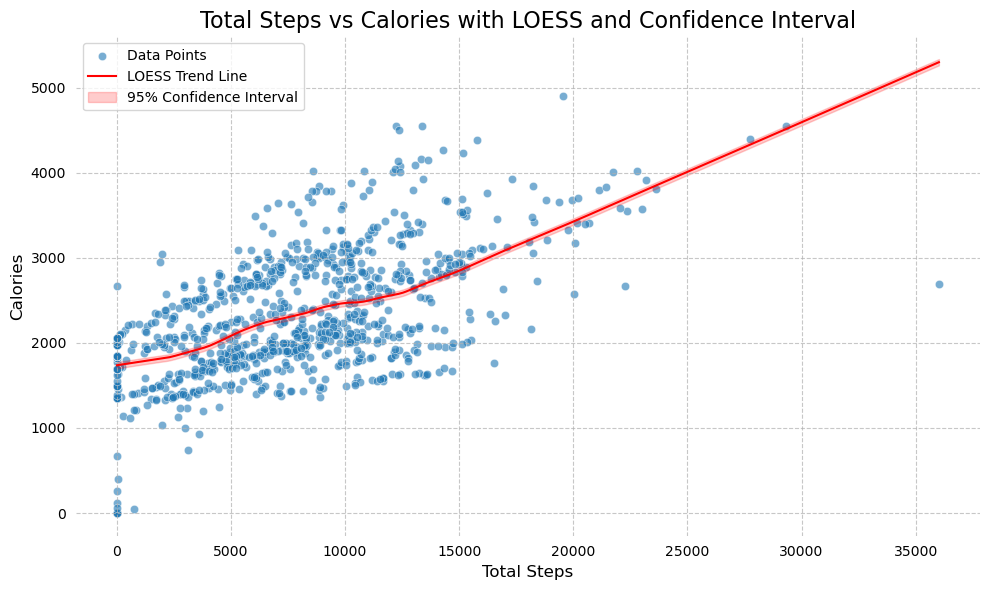

In [14]:
# Define a function to calculate LOESS with confidence intervals
def loess_with_confidence(data_x, data_y, frac=0.3, alpha=0.05):
    loess_result = lowess(data_y, data_x, frac=frac, return_sorted=True)
    sorted_x, smoothed_y = loess_result[:, 0], loess_result[:, 1]
    
    residuals = data_y - np.interp(data_x, sorted_x, smoothed_y)
    se = np.std(residuals) / np.sqrt(len(data_x))
    
    t_value = t.ppf(1 - alpha / 2, df=len(data_x) - 1)
    ci_margin = t_value * se
    
    upper_ci = smoothed_y + ci_margin
    lower_ci = smoothed_y - ci_margin
    
    return sorted_x, smoothed_y, upper_ci, lower_ci

# Calculate LOESS with confidence intervals
sorted_x, smoothed_y, upper_ci, lower_ci = loess_with_confidence(
    daily_activity_df['total_steps'], 
    daily_activity_df['calories'], 
    frac=0.3
)

# Create the plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=daily_activity_df, x='total_steps', y='calories', alpha=0.6, label='Data Points')

# Remove plot spines (border) and ticks
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.tick_params(axis='both', which='both', bottom=False, left=False)

# Add LOESS line and confidence intervals
plt.plot(sorted_x, smoothed_y, color='red', label='LOESS Trend Line')
plt.fill_between(sorted_x, lower_ci, upper_ci, color='red', alpha=0.2, label='95% Confidence Interval')

# Add titles and labels
plt.title('Total Steps vs Calories with LOESS and Confidence Interval', fontsize=16)
plt.xlabel('Total Steps', fontsize=12)
plt.ylabel('Calories', fontsize=12)

# Improve layout and styling
plt.legend()
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()

In [15]:
# Perform correlation on the relevant columns in daily_activity_df
correlation_matrix = daily_activity_df[['total_steps', 'calories']].corr(method='pearson')

correlation_matrix

,total_steps,calories
total_steps,1.00,0.59
calories,0.59,1.00


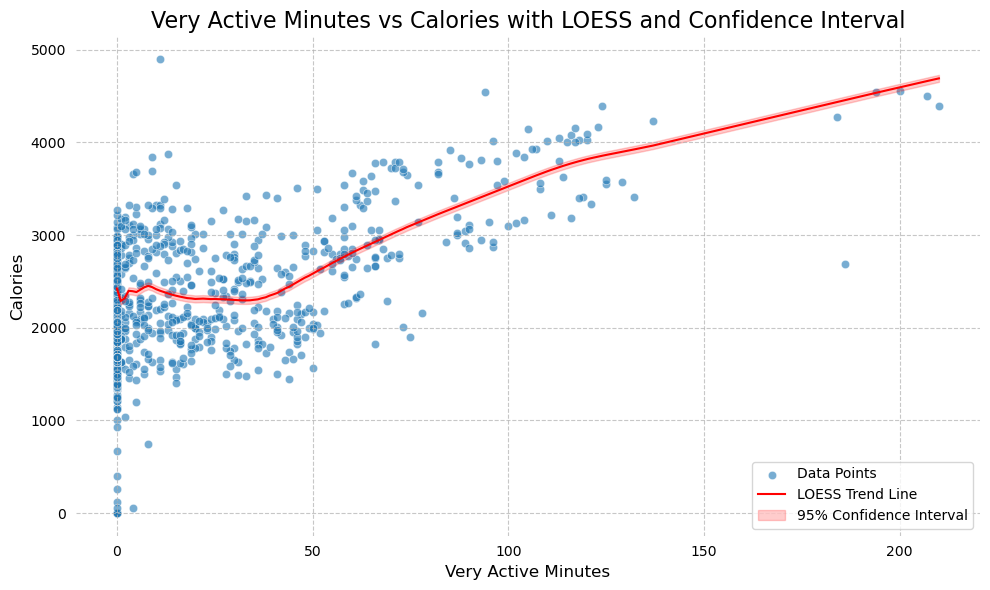

In [16]:
# Define a function to calculate LOESS with confidence intervals
def loess_with_confidence(data_x, data_y, frac=0.3, alpha=0.05):
    loess_result = lowess(data_y, data_x, frac=frac, return_sorted=True)
    sorted_x, smoothed_y = loess_result[:, 0], loess_result[:, 1]
    
    residuals = data_y - np.interp(data_x, sorted_x, smoothed_y)
    se = np.std(residuals) / np.sqrt(len(data_x))
    
    t_value = t.ppf(1 - alpha / 2, df=len(data_x) - 1)
    ci_margin = t_value * se
    
    upper_ci = smoothed_y + ci_margin
    lower_ci = smoothed_y - ci_margin
    
    return sorted_x, smoothed_y, upper_ci, lower_ci

# Calculate LOESS with confidence intervals
sorted_x, smoothed_y, upper_ci, lower_ci = loess_with_confidence(
    daily_activity_df['very_active_minutes'], 
    daily_activity_df['calories'], 
    frac=0.3
)

# Create the plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=daily_activity_df, x='very_active_minutes', y='calories', alpha=0.6, label='Data Points')

# Remove plot spines (border) and ticks
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.tick_params(axis='both', which='both', bottom=False, left=False)

# Add LOESS line and confidence intervals
plt.plot(sorted_x, smoothed_y, color='red', label='LOESS Trend Line')
plt.fill_between(sorted_x, lower_ci, upper_ci, color='red', alpha=0.2, label='95% Confidence Interval')

# Add titles and labels
plt.title('Very Active Minutes vs Calories with LOESS and Confidence Interval', fontsize=16)
plt.xlabel('Very Active Minutes', fontsize=12)
plt.ylabel('Calories', fontsize=12)

# Improve layout and styling
plt.legend()
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()

In [17]:
# Perform correlation on the relevant columns in daily_activity_df
correlation_matrix = daily_activity_df[['very_active_minutes', 'calories']].corr(method='pearson')

correlation_matrix

,very_active_minutes,calories
very_active_minutes,1.00,0.62
calories,0.62,1.00


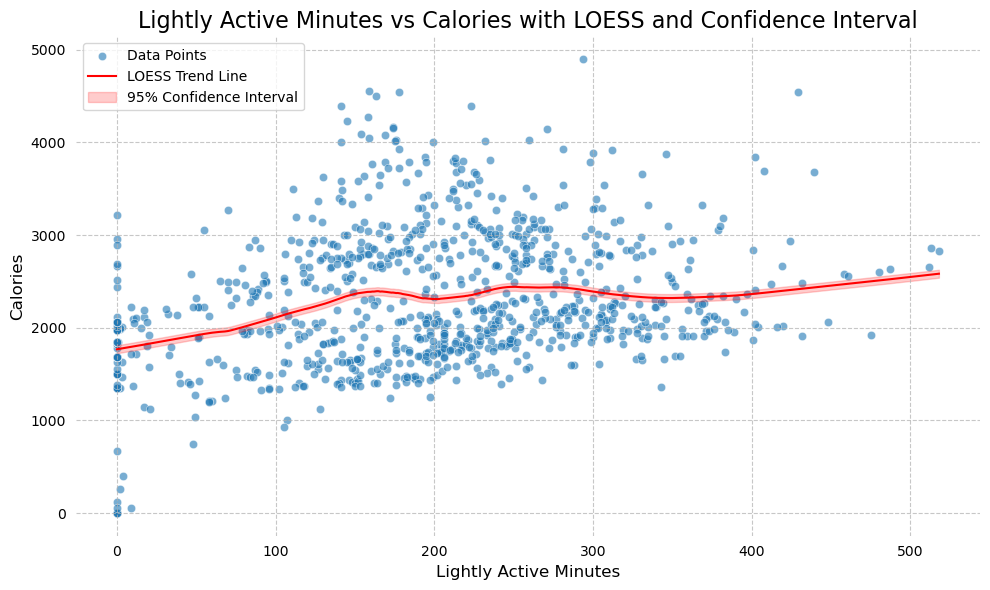

In [18]:
# Define a function to calculate LOESS with confidence intervals
def loess_with_confidence(data_x, data_y, frac=0.3, alpha=0.05):
    loess_result = lowess(data_y, data_x, frac=frac, return_sorted=True)
    sorted_x, smoothed_y = loess_result[:, 0], loess_result[:, 1]
    
    residuals = data_y - np.interp(data_x, sorted_x, smoothed_y)
    se = np.std(residuals) / np.sqrt(len(data_x))
    
    t_value = t.ppf(1 - alpha / 2, df=len(data_x) - 1)
    ci_margin = t_value * se
    
    upper_ci = smoothed_y + ci_margin
    lower_ci = smoothed_y - ci_margin
    
    return sorted_x, smoothed_y, upper_ci, lower_ci

# Calculate LOESS with confidence intervals
sorted_x, smoothed_y, upper_ci, lower_ci = loess_with_confidence(
    daily_activity_df['lightly_active_minutes'], 
    daily_activity_df['calories'], 
    frac=0.3
)

# Create the plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=daily_activity_df, x='lightly_active_minutes', y='calories', alpha=0.6, label='Data Points')

# Add LOESS line and confidence intervals
plt.plot(sorted_x, smoothed_y, color='red', label='LOESS Trend Line')
plt.fill_between(sorted_x, lower_ci, upper_ci, color='red', alpha=0.2, label='95% Confidence Interval')

# Remove plot spines (border) and ticks
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.tick_params(axis='both', which='both', bottom=False, left=False)

# Add titles and labels
plt.title('Lightly Active Minutes vs Calories with LOESS and Confidence Interval', fontsize=16)
plt.xlabel('Lightly Active Minutes', fontsize=12)
plt.ylabel('Calories', fontsize=12)

# Improve layout and styling
plt.legend()
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()

In [19]:
# Perform correlation on the relevant columns in daily_activity_df
correlation_matrix = daily_activity_df[['lightly_active_minutes', 'calories']].corr(method='pearson')

correlation_matrix


,lightly_active_minutes,calories
lightly_active_minutes,1.00,0.29
calories,0.29,1.00


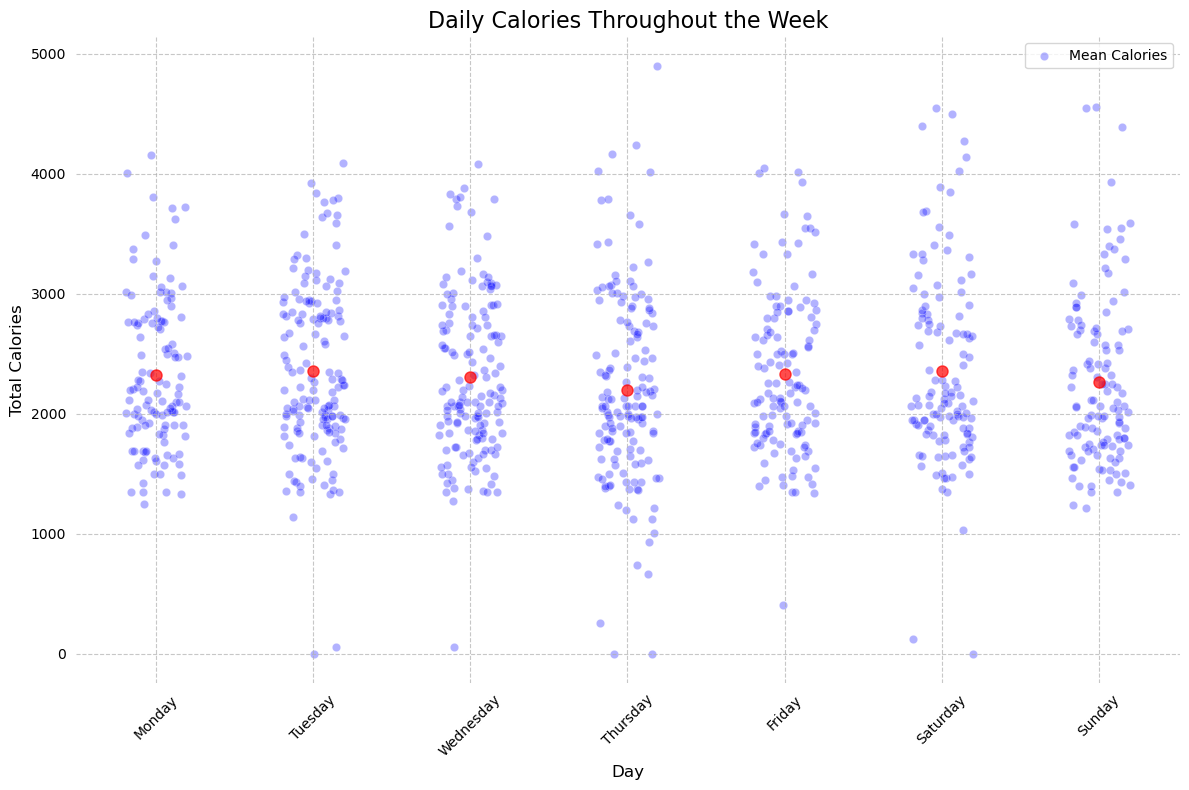

In [20]:
# Define the order of days
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Add jitter for better visualization
daily_activity_df["day_numeric"] = (
    daily_activity_df["day_of_week"].map({day: i for i, day in enumerate(days_order)}) +
    np.random.uniform(-0.2, 0.2, len(daily_activity_df))
)

# Plot without hue
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=daily_activity_df,
    x="day_numeric",
    y="calories",
    alpha=0.3,
    color="blue",
    legend=False,
)

# Add mean points
mean_calories = daily_activity_df.groupby("day_of_week")["calories"].mean().reindex(days_order)
plt.plot(range(len(days_order)), mean_calories.values, 'o', color='red', label='Mean Calories', markersize=8, alpha=0.7)

# Remove plot spines (border) and ticks
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.tick_params(axis='both', which='both', bottom=False, left=False)

# Customize the x-axis
plt.xticks(ticks=range(len(days_order)), labels=days_order, rotation=45)
plt.xlabel("Day", fontsize=12)
plt.ylabel("Total Calories", fontsize=12)

# Add title and legend
plt.title("Daily Calories Throughout the Week", fontsize=16)
plt.legend(["Mean Calories"])
plt.grid(visible=True, linestyle='--', alpha=0.7)

# Adjust layout and show
plt.tight_layout()
plt.show()


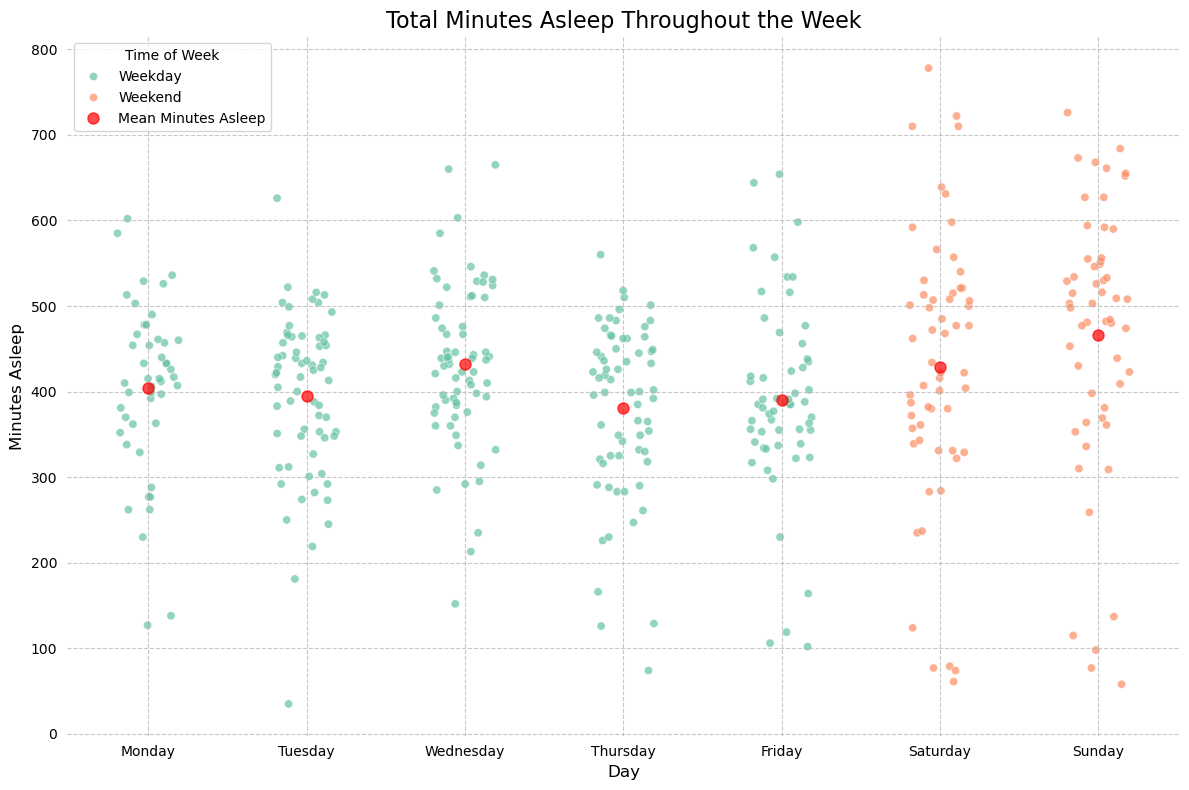

In [21]:

# Add jitter for better visualization
sleep_data["day_numeric"] = (
    sleep_data["day_of_week"].map({day: i for i, day in enumerate(days_order)}) +
    np.random.uniform(-0.2, 0.2, len(sleep_data))
)

# Plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=sleep_data,
    x="day_numeric",
    y="total_asleep_merged",
    hue="week_type",
    alpha=0.7,
    palette="Set2"
)

# Add mean points for each day
mean_asleep = sleep_data.groupby("day_of_week")["total_asleep_merged"].mean().reindex(days_order)
plt.plot(range(len(days_order)), mean_asleep.values, 'o', color='red', label='Mean Minutes Asleep', markersize=8, alpha=0.7)

# Remove plot spines (border) and ticks
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.tick_params(axis='both', which='both', bottom=False, left=False)

# Customize the x-axis
plt.xticks(ticks=range(len(days_order)), labels=days_order)
plt.xlabel("Day", fontsize=12)
plt.ylabel("Minutes Asleep", fontsize=12)

# Add title and legend
plt.title("Total Minutes Asleep Throughout the Week", fontsize=16)
plt.legend(title="Time of Week")
plt.grid(visible=True, linestyle='--', alpha=0.7)

# Adjust layout and show
plt.tight_layout()
plt.show()


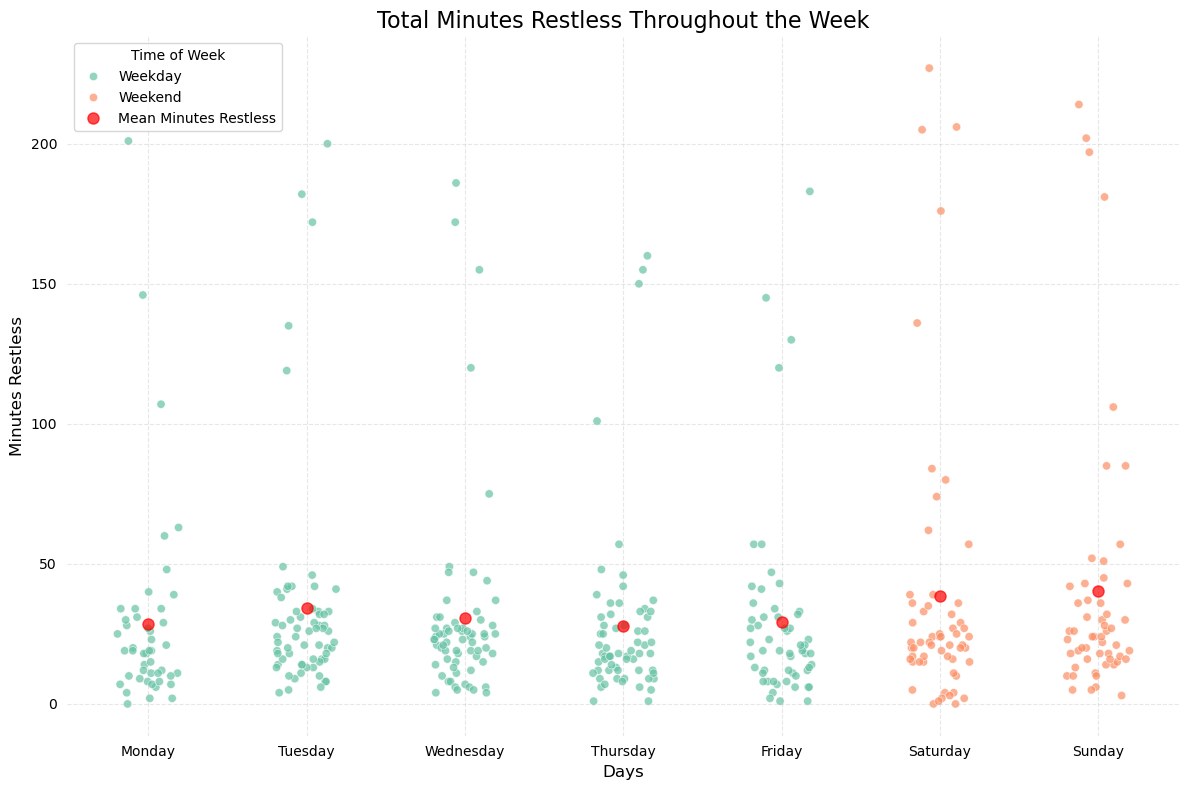

In [22]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=sleep_data, x='day_numeric', y='total_restless_merged', hue='week_type',  alpha=0.7, palette='Set2')

mean_restless=sleep_data.groupby('day_of_week')['total_restless_merged'].mean().reindex(days_order)
plt.plot(range(len(days_order)), mean_restless.values,'o',color='red',label='Mean Minutes Restless', markersize=8,alpha=0.7)

# Remove plot spines (border) and ticks
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.tick_params(axis='both', which='both', bottom=False, left=False)

plt.xticks(ticks=range(len(days_order)), labels=days_order)
plt.xlabel('Days', fontsize=12)
plt.ylabel('Minutes Restless', fontsize=12)

plt.title('Total Minutes Restless Throughout the Week', fontsize=16)
plt.legend(title="Time of Week")
plt.grid(visible=True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()



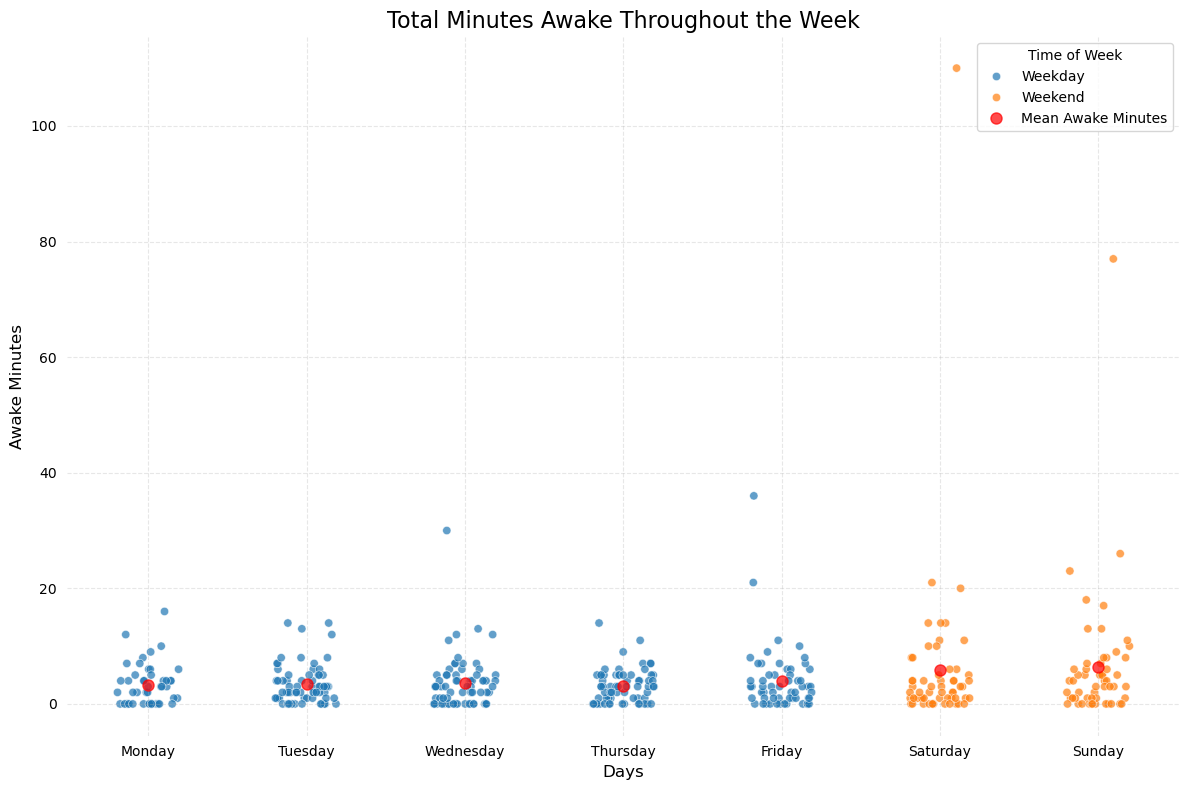

In [23]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=sleep_data, x='day_numeric', y='total_awake_merged', hue='week_type', alpha=0.7)

mean_awake=sleep_data.groupby('day_of_week').agg({'total_awake_merged': 'mean'}).reindex(days_order)
plt.plot(range(len(days_order)), mean_awake.values, 'o', color='red',label='Mean Awake Minutes', markersize=8, alpha=0.7)

# Remove plot spines (border) and ticks
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.tick_params(axis='both', which='both', bottom=False, left=False)

plt.xticks(ticks=range(len(days_order)), labels=days_order)
plt.legend(title="Time of Week")
plt.xlabel('Days', fontsize=12)
plt.ylabel('Awake Minutes', fontsize=12)

plt.title('Total Minutes Awake Throughout the Week', fontsize=16)
plt.grid(visible=True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

In [24]:
# Rename the column 'date' to 'activity_date'
daily_weight_df.rename(columns={'date': 'activity_date'}, inplace=True)

daily_0=daily_activity_df.merge(sleep_data, on=['id', 'activity_date','day_of_week', 'week_type'], how='left')
daily_df=daily_0.merge(daily_weight_df, on=['id', 'activity_date','day_of_week', 'week_type'], how='left')

hourly_0=hourly_calories_df.merge(hourly_intensities_df, on=['id', 'activity_hour',  'activity_time', 'activity_date',
       'hour_of_day', 'day_of_week', 'week_type'], how='left')
hourly_df=hourly_0.merge(hourly_steps_df, on=['id', 'activity_hour',  'activity_time', 'activity_date',
       'hour_of_day', 'day_of_week', 'week_type'], how='left' )


weekly_data_0 = daily_df[['id', 'activity_date', 'day_of_week', 'total_steps', 'total_distance','very_active_distance', 'moderately_active_distance',
       'light_active_distance', 'sedentary_active_distance','very_active_minutes', 'fairly_active_minutes',
       'lightly_active_minutes', 'sedentary_minutes', 'calories']].assign(
        week_number=lambda df: "Week " + 
        (df["activity_date"].dt.strftime("%U")) + ", " + 
        df["activity_date"].dt.strftime("%b %Y")
    )

# weekly_data_0.head()

In [25]:
weekly_data = (
    weekly_data_0.groupby(["id", "week_number"], as_index=False)
    .agg(
        weekly_total_steps=("total_steps", "sum"),
        weekly_total_distance=("total_distance", "sum"),
        weekly_vigorous_d=("very_active_distance", "sum"),
        weekly_moderate_d=("moderately_active_distance", "sum"),
        weekly_light_d=("light_active_distance", "sum"),
        weekly_sedentary_d=("sedentary_active_distance", "sum"),
        weekly_vigorous_m=("very_active_minutes", "sum"),
        weekly_moderate_m=("fairly_active_minutes", "sum"),
        weekly_light_m=("lightly_active_minutes", "sum"),
        weekly_sedentary_m=("sedentary_minutes", "sum"),
        weekly_calories=("calories", "sum"),
    )
)

# Add calculated columns to `weekly_data`
weekly_data["weekly_mod_vig_m"] = weekly_data["weekly_vigorous_m"] + weekly_data["weekly_moderate_m"]
weekly_data["weekly_light_sed_m"] = weekly_data["weekly_light_m"] + weekly_data["weekly_sedentary_m"]


In [26]:
weekly_data.head()

,id,week_number,weekly_total_steps,weekly_total_distance,weekly_vigorous_d,weekly_moderate_d,weekly_light_d,weekly_sedentary_d,weekly_vigorous_m,weekly_moderate_m,weekly_light_m,weekly_sedentary_m,weekly_calories,weekly_mod_vig_m,weekly_light_sed_m
0,1503960366,"Week 15, Apr 2016",56788,36.65,10.74,3.31,22.55,0.00,141,87,1156,4221,9166,228,5377
1,1503960366,"Week 16, Apr 2016",85728,55.14,20.84,5.56,28.74,0.00,284,135,1469,6068,13021,419,7537
2,1503960366,"Week 17, Apr 2016",96291,62.14,25.10,5.19,31.81,0.00,337,127,1625,5773,13612,464,7398
3,1503960366,"Week 18, May 2016",89753,57.97,19.04,7.54,31.36,0.00,266,172,1694,5967,13309,438,7661
4,1503960366,"Week 19, May 2016",47059,30.20,12.89,3.02,14.28,0.00,172,73,874,4264,7201,245,5138


In [27]:
daily_df.describe().T

,count,mean,min,25%,50%,75%,max,std
id,943.00,4858486292.58,1503960366.00,2320127002.00,4445114986.00,6962181067.00,8877689391.00,2423712098.16
activity_date,943,2016-04-26 07:21:18.897136896,2016-04-12 00:00:00,2016-04-19 00:00:00,2016-04-26 00:00:00,2016-05-04 00:00:00,2016-05-12 00:00:00,NaN
total_steps,943.00,7652.19,0.00,3795.00,7439.00,10734.00,36019.00,5086.53
total_distance,943.00,5.50,0.00,2.62,5.26,7.72,28.03,3.93
tracker_distance,943.00,5.49,0.00,2.62,5.26,7.71,28.03,3.91
logged_activities_distance,943.00,0.11,0.00,0.00,0.00,0.00,4.94,0.62
very_active_distance,943.00,1.50,0.00,0.00,0.22,2.06,21.92,2.66
moderately_active_distance,943.00,0.57,0.00,0.00,0.24,0.81,6.48,0.88
light_active_distance,943.00,3.35,0.00,1.95,3.38,4.79,10.71,2.05
sedentary_active_distance,943.00,0.00,0.00,0.00,0.00,0.00,0.11,0.01


In [28]:
hourly_df.describe().T

,count,mean,min,25%,50%,75%,max,std
id,22099.00,4848235270.22,1503960366.00,2320127002.00,4445114986.00,6962181067.00,8877689391.00,2422500401.42
activity_hour,22099,2016-04-26 11:46:42.588352512,2016-04-12 00:00:00,2016-04-19 01:00:00,2016-04-26 06:00:00,2016-05-03 19:00:00,2016-05-12 15:00:00,NaN
calories,22099.00,97.39,42.00,63.00,83.00,108.00,948.00,60.70
hour_of_day,22099.00,11.42,0.00,5.00,11.00,17.00,23.00,6.92
total_intensity,22099.00,12.04,0.00,0.00,3.00,16.00,180.00,21.13
average_intensity,22099.00,0.20,0.00,0.00,0.05,0.27,3.00,0.35
step_total,22099.00,320.17,0.00,0.00,40.00,357.00,10554.00,690.38


In [29]:
weekly_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,154.00,4849688735.31,2423967164.89,1503960366.00,2320127002.00,4445114986.00,6962181067.00,8877689391.00
weekly_total_steps,154.00,46857.23,26365.11,0.00,30671.00,44903.00,63218.75,116758.00
weekly_total_distance,154.00,33.70,20.19,0.00,20.33,32.50,43.78,98.97
weekly_vigorous_d,154.00,9.21,12.56,0.00,0.52,4.38,12.93,65.59
weekly_moderate_d,154.00,3.50,3.90,0.00,0.73,2.24,5.03,25.53
weekly_light_d,154.00,20.51,10.66,0.00,12.95,20.59,27.59,47.34
weekly_sedentary_d,154.00,0.01,0.02,0.00,0.00,0.00,0.00,0.13
weekly_vigorous_m,154.00,130.06,162.47,0.00,8.00,68.50,182.50,775.00
weekly_moderate_m,154.00,83.45,87.70,0.00,17.00,65.50,122.00,549.00
weekly_light_m,154.00,1181.97,578.55,0.00,802.00,1188.50,1554.25,2590.00


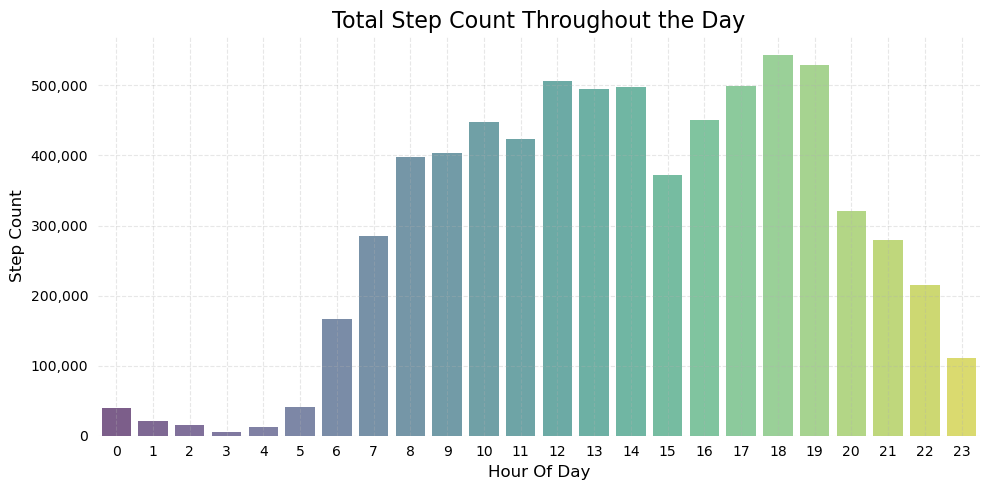

In [30]:
plt.figure(figsize=(10,5))
hourly_step_count=hourly_df.groupby('hour_of_day')['step_total'].sum().reset_index()
sns.barplot(data=hourly_step_count, x='hour_of_day', y='step_total', palette="viridis", alpha=0.7)

plt.title('Total Step Count Throughout the Day', fontsize=16)
plt.xlabel('Hour Of Day', fontsize=12)
plt.ylabel('Step Count', fontsize=12)

# Remove plot spines (border) and ticks
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.tick_params(axis='both', which='both', bottom=False, left=False)

# Customize y-axis format (comma-separated)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.grid(visible=True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

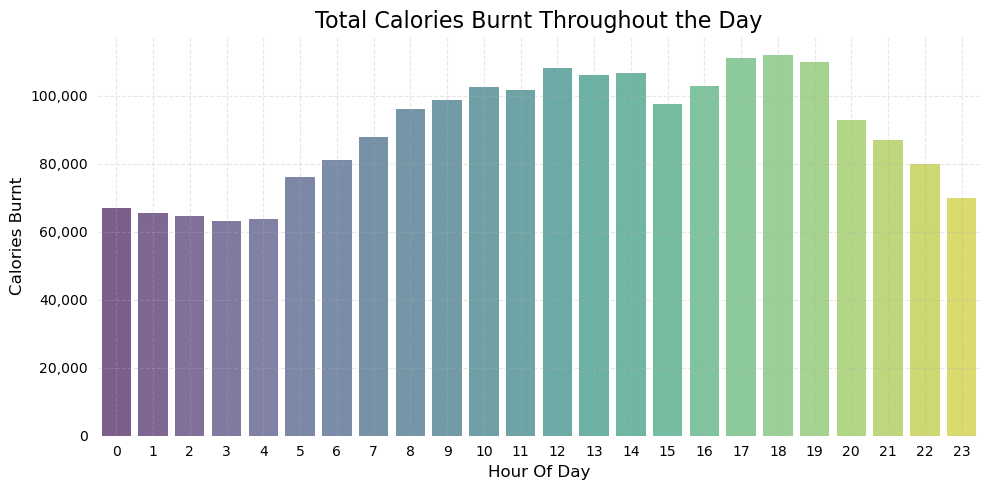

In [31]:
plt.figure(figsize=(10,5))
hourly_calories_burnt=hourly_df.groupby('hour_of_day')['calories'].sum().reset_index()
sns.barplot(data=hourly_calories_burnt, x='hour_of_day', y='calories', palette='viridis', alpha=0.7)

plt.title('Total Calories Burnt Throughout the Day', fontsize=16)
plt.xlabel('Hour Of Day', fontsize=12)
plt.ylabel('Calories Burnt', fontsize=12)

# Remove plot spines (border) and ticks
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.tick_params(axis='both', which='both', bottom=False, left=False)

# Customize y-axis format (comma-separated)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.grid(visible=True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

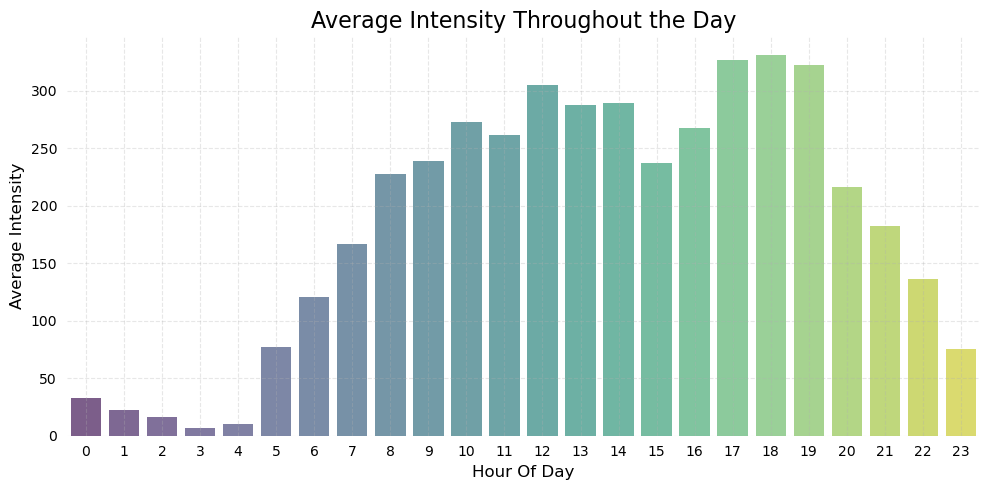

In [32]:
plt.figure(figsize=(10,5))
hourly_calories_burnt=hourly_df.groupby('hour_of_day')['average_intensity'].sum().reset_index()
sns.barplot(data=hourly_calories_burnt, x='hour_of_day', y='average_intensity', palette='viridis', alpha=0.7)

plt.title('Average Intensity Throughout the Day', fontsize=16)
plt.xlabel('Hour Of Day', fontsize=12)
plt.ylabel('Average Intensity', fontsize=12)

# Remove plot spines (border) and ticks
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.tick_params(axis='both', which='both', bottom=False, left=False)

# Customize y-axis format (comma-separated)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.grid(visible=True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

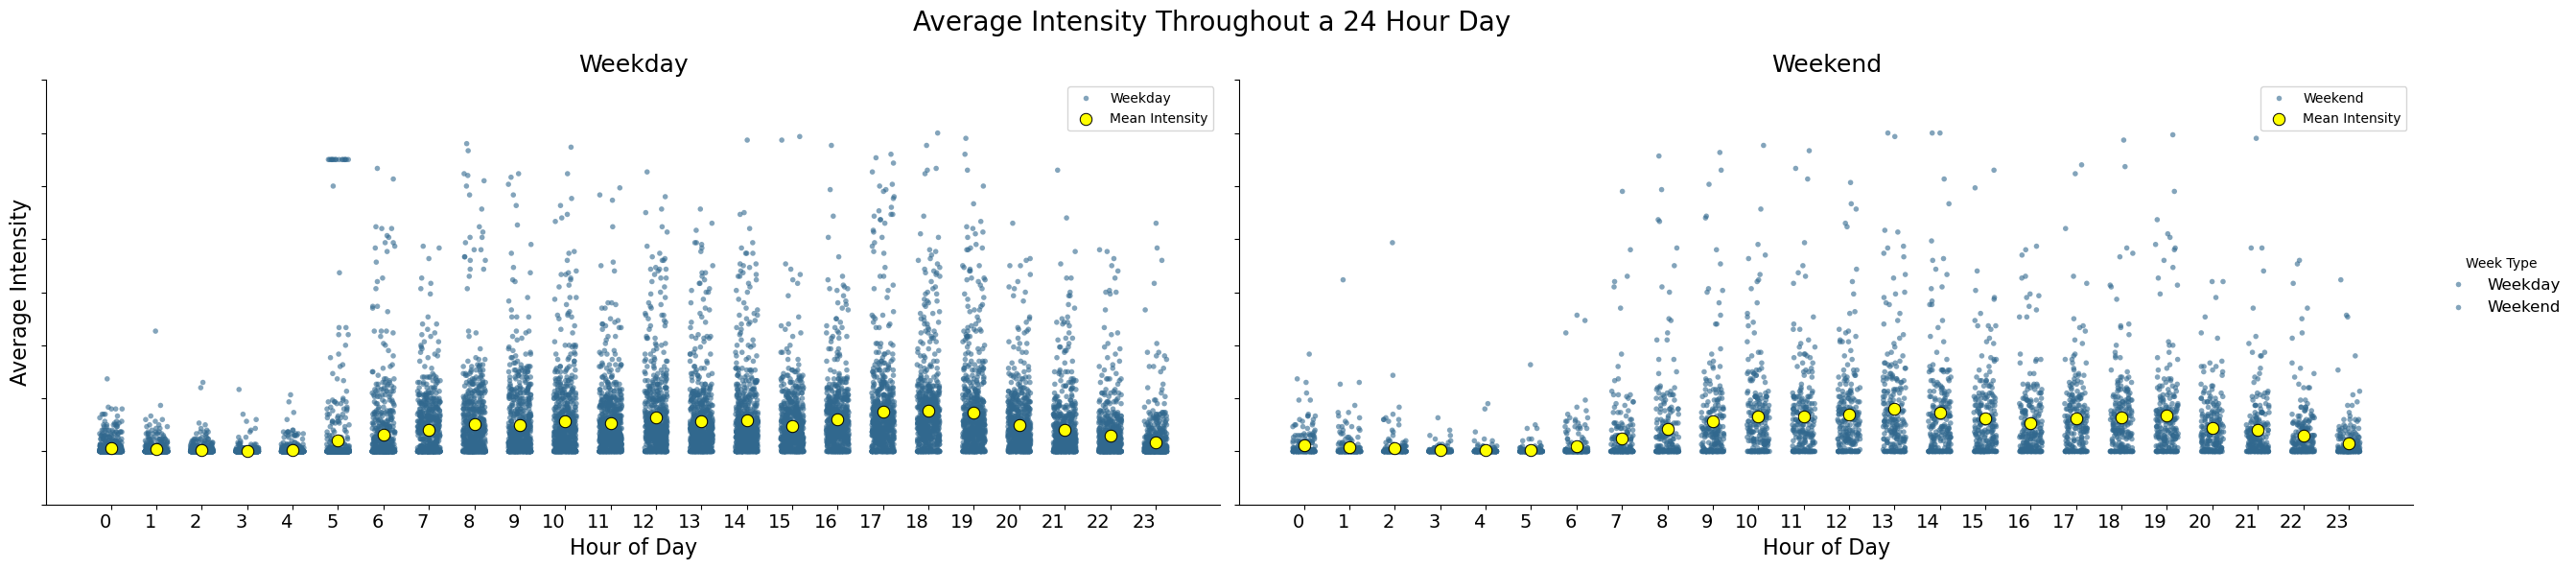

In [33]:
# Compute the mean for each combination of 'hour_of_day' and 'week_type'
mean_intensity = hourly_df.groupby(["hour_of_day", "week_type"])["average_intensity"].mean().reset_index()


# Set up the FacetGrid with a very large height and gap for readability
g = sns.FacetGrid(
    hourly_df, 
    col="week_type", 
    col_wrap=2, 
    sharey=True, 
    height=6,  # Increase the height of individual plots
    aspect=2   # Increase the width of individual plots
)

# Add jittered scatter points
g.map_dataframe(
    sns.stripplot,
    x="hour_of_day",
    y="average_intensity",
    hue="week_type",
    palette=sns.color_palette("viridis", n_colors=2),
    alpha=0.6,
    size=4,
    jitter=0.25,
    dodge=False
)

# Overlay mean points
for ax, (_, data) in zip(g.axes.flat, mean_intensity.groupby("week_type")):
    sns.scatterplot(
        ax=ax,
        data=data,
        x="hour_of_day",
        y="average_intensity",
        color="yellow",
        s=80,  # Make the mean points larger for better visibility
        edgecolor="black",
        zorder=3,
        label="Mean Intensity"
    )

# Improve axis label readability
g.set_titles(col_template="{col_name}", size=18)
g.set_axis_labels("Hour of Day", "Average Intensity", fontsize=16)
g.set_xticklabels(fontsize=14, ha="right")  # Align x-axis labels for clarity
g.set_yticklabels(fontsize=14)

# Increase the spacing between subplots
g.fig.subplots_adjust(top=0.92, hspace=1.2)  # Substantially larger gap (hspace)

# Add a single legend outside the plot
g.add_legend(title="Week Type", bbox_to_anchor=(1, 0.5), loc="center left", fontsize=12)

# Add a title to the entire figure
g.fig.suptitle("Average Intensity Throughout a 24 Hour Day", fontsize=20, y=0.98)

# Final adjustments to layout
plt.tight_layout()
plt.show()


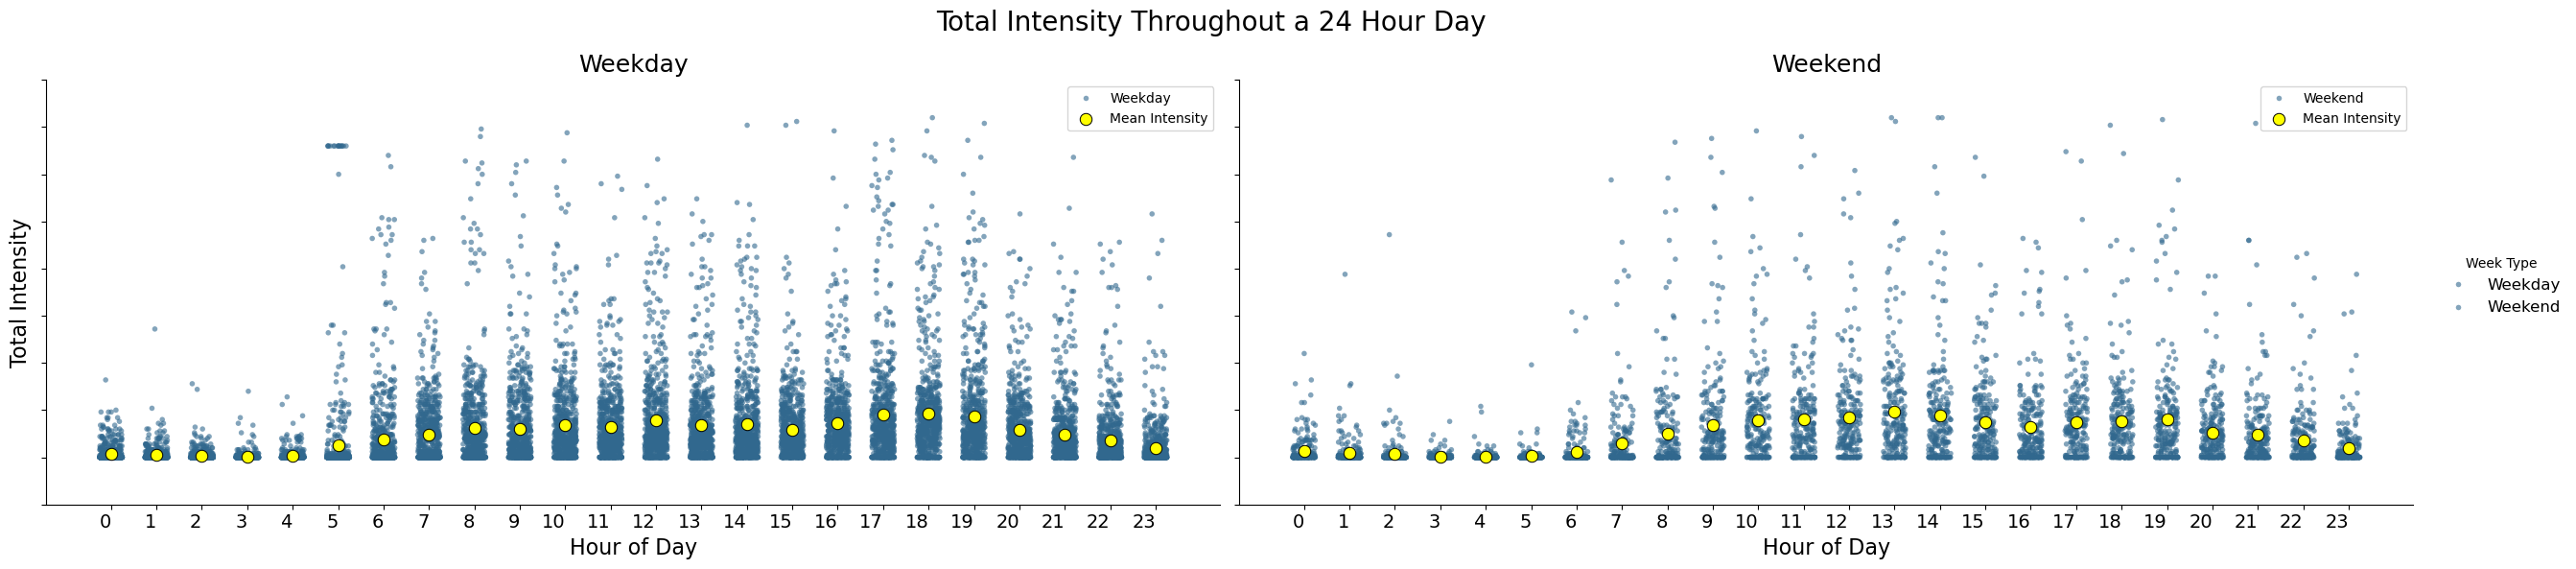

In [34]:
# Compute the mean for each combination of 'hour_of_day' and 'week_type'
mean_intensity = hourly_df.groupby(["hour_of_day", "week_type"])["total_intensity"].mean().reset_index()


# Set up the FacetGrid with a very large height and gap for readability
g = sns.FacetGrid(
    hourly_df, 
    col="week_type", 
    col_wrap=2, 
    sharey=True, 
    height=6,  # Increase the height of individual plots
    aspect=2   # Increase the width of individual plots
)

# Add jittered scatter points
g.map_dataframe(
    sns.stripplot,
    x="hour_of_day",
    y="total_intensity",
    hue="week_type",
    palette=sns.color_palette("viridis", n_colors=2),
    alpha=0.6,
    size=4,
    jitter=0.25,
    dodge=False
)

# Overlay mean points
for ax, (_, data) in zip(g.axes.flat, mean_intensity.groupby("week_type")):
    sns.scatterplot(
        ax=ax,
        data=data,
        x="hour_of_day",
        y="total_intensity",
        color="yellow",
        s=80,  # Make the mean points larger for better visibility
        edgecolor="black",
        zorder=3,
        label="Mean Intensity"
    )

# Improve axis label readability
g.set_titles(col_template="{col_name}", size=18)
g.set_axis_labels("Hour of Day", "Total Intensity", fontsize=16)
g.set_xticklabels(fontsize=14, ha="right")  # Align x-axis labels for clarity
g.set_yticklabels(fontsize=14)

# Increase the spacing between subplots
g.fig.subplots_adjust(top=0.92, hspace=1.2)  # Substantially larger gap (hspace)

# Add a single legend outside the plot
g.add_legend(title="Week Type", bbox_to_anchor=(1, 0.5), loc="center left", fontsize=12)

# Add a title to the entire figure
g.fig.suptitle("Total Intensity Throughout a 24 Hour Day", fontsize=20, y=0.98)

# Final adjustments to layout
plt.tight_layout()
plt.show()


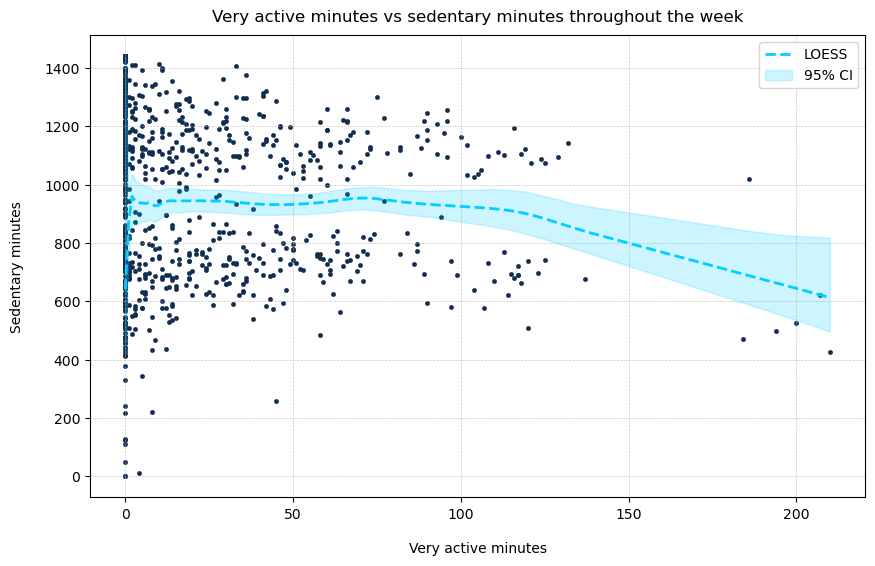

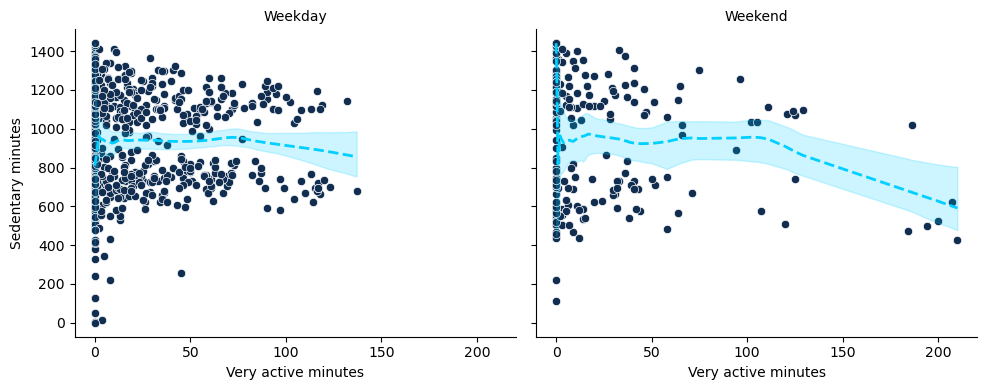

In [35]:
# Assuming daily_df is already loaded as a pandas DataFrame
# Drop 'week_type' column from the dataset
dd02_A = daily_df.drop(columns=['week_type'], errors='ignore')

# Define the custom theme for margins
def apply_theme(ax):
    ax.set_title("Very active minutes vs sedentary minutes throughout the week", pad=10)
    ax.set_xlabel("Very active minutes", labelpad=15)
    ax.set_ylabel("Sedentary minutes", labelpad=15)

# Function to calculate LOESS with confidence intervals using bootstrapping
def loess_with_ci(x, y, frac=0.3, n_boot=1000, alpha=0.05):
    loess_fit = lowess(y, x, frac=frac)
    x_fit, y_fit = loess_fit[:, 0], loess_fit[:, 1]
    
    # Bootstrapping
    boot_y_fits = []
    for _ in range(n_boot):
        sample_indices = np.random.choice(len(x), size=len(x), replace=True)
        boot_loess = lowess(y[sample_indices], x[sample_indices], frac=frac)
        boot_y_fits.append(np.interp(x_fit, boot_loess[:, 0], boot_loess[:, 1]))
    boot_y_fits = np.array(boot_y_fits)
    
    # Confidence intervals
    lower_bound = np.percentile(boot_y_fits, 100 * (alpha / 2), axis=0)
    upper_bound = np.percentile(boot_y_fits, 100 * (1 - alpha / 2), axis=0)
    return x_fit, y_fit, lower_bound, upper_bound

# Create the main scatterplot
plt.figure(figsize=(10, 6))

# Add grey jitter points (valid color code for light grey)
sns.scatterplot(
    x=dd02_A['very_active_minutes'],
    y=dd02_A['sedentary_minutes'],
    color="#B3B3B3",  # Light grey
    alpha=0.5,
    edgecolor=None,
    s=10
)

# Add the blue jitter points
sns.scatterplot(
    x=daily_df['very_active_minutes'],
    y=daily_df['sedentary_minutes'],
    color="#112E51",
    edgecolor=None,
    s=10
)

# Compute LOESS with confidence intervals
x_fit, y_fit, lower_bound, upper_bound = loess_with_ci(
    daily_df['very_active_minutes'].values, 
    daily_df['sedentary_minutes'].values, 
    frac=0.3, 
    n_boot=1000
)

# Plot LOESS line
plt.plot(x_fit, y_fit, color="#00CFFF", linestyle="dashed", linewidth=2, label="LOESS")

# Plot confidence interval
plt.fill_between(
    x_fit, lower_bound, upper_bound, color="#00CFFF", alpha=0.2, label="95% CI"
)

# Apply theme and finalize plot
ax = plt.gca()
apply_theme(ax)
plt.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend()

# Facet grid for week_type with LOESS and CI
g = sns.FacetGrid(daily_df, col='week_type', col_wrap=4, height=4, aspect=1.2)

def add_loess_with_ci(data, **kwargs):
    x = data['very_active_minutes'].values
    y = data['sedentary_minutes'].values
    x_fit, y_fit, lower_bound, upper_bound = loess_with_ci(x, y, frac=0.3, n_boot=500)
    
    # Plot LOESS line
    plt.plot(x_fit, y_fit, color="#00CFFF", linestyle="dashed", linewidth=2)
    
    # Plot confidence interval
    plt.fill_between(x_fit, lower_bound, upper_bound, color="#00CFFF", alpha=0.2)

# Map scatterplot and LOESS with CI onto FacetGrid
g.map(
    sns.scatterplot,
    "very_active_minutes",
    "sedentary_minutes",
    color="#112E51"
)
g.map_dataframe(add_loess_with_ci)

# Set axis labels and titles
g.set_axis_labels("Very active minutes", "Sedentary minutes")
g.set_titles("{col_name}")
g.fig.tight_layout()

# Show the plots
plt.show()


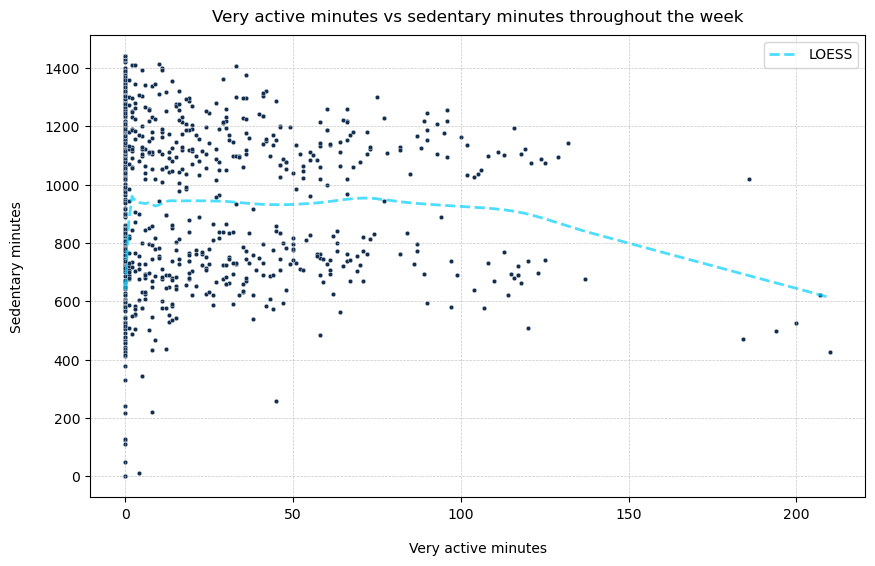

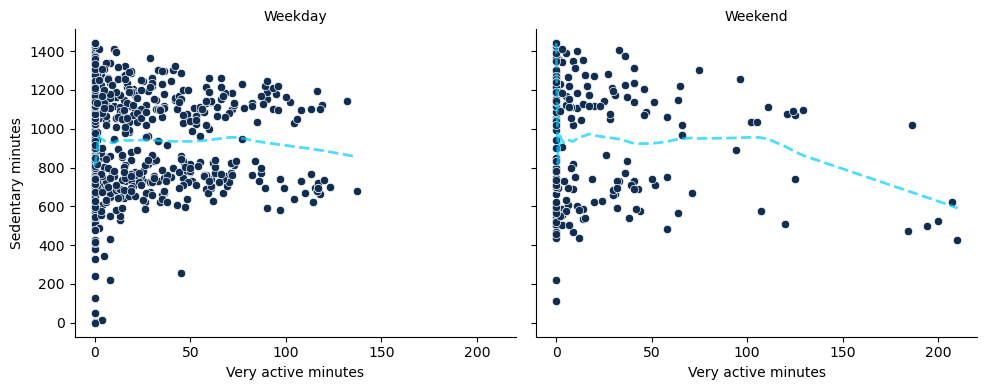

In [36]:
# Create the main scatterplot
plt.figure(figsize=(10, 6))

# Add grey jitter points (valid color code for light grey)
sns.scatterplot(
    x=dd02_A['very_active_minutes'],
    y=dd02_A['sedentary_minutes'],
    color="#B3B3B3",  # Light grey
    alpha=0.5,
    edgecolor=None,
    s=10
)

# Add the blue jitter points
sns.scatterplot(
    x=daily_df['very_active_minutes'],
    y=daily_df['sedentary_minutes'],
    color="#112E51",
    s=10
)

# Compute LOESS smoothed values
loess_smoothed = lowess(
    daily_df['sedentary_minutes'], 
    daily_df['very_active_minutes'], 
    frac=0.3  # Adjust the smoothing parameter (0.3 is typical)
)

# Plot LOESS line
plt.plot(
    loess_smoothed[:, 0],  # x values
    loess_smoothed[:, 1],  # y values
    color="#00CFFF",
    linestyle="dashed",
    linewidth=2,
    alpha=0.7,
    label="LOESS"
)

# Apply theme and finalize plot
ax = plt.gca()
apply_theme(ax)
plt.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend()

# Facet grid for week_type with LOESS
g = sns.FacetGrid(daily_df, col='week_type', col_wrap=4, height=4, aspect=1.2)

def add_loess(data, color, **kwargs):
    # Compute LOESS for each facet
    loess_smoothed = lowess(
        data['sedentary_minutes'], 
        data['very_active_minutes'], 
        frac=0.3
    )
    plt.plot(
        loess_smoothed[:, 0],
        loess_smoothed[:, 1],
        color="#00CFFF",
        linestyle="dashed",
        linewidth=2,
        alpha=0.7
    )

# Map scatterplot and LOESS onto FacetGrid
g.map(
    sns.scatterplot,
    "very_active_minutes",
    "sedentary_minutes",
    color="#112E51"
)
g.map_dataframe(add_loess)

# Set axis labels and titles
g.set_axis_labels("Very active minutes", "Sedentary minutes")
g.set_titles("{col_name}")
g.fig.tight_layout()

# Show the plots
plt.show()


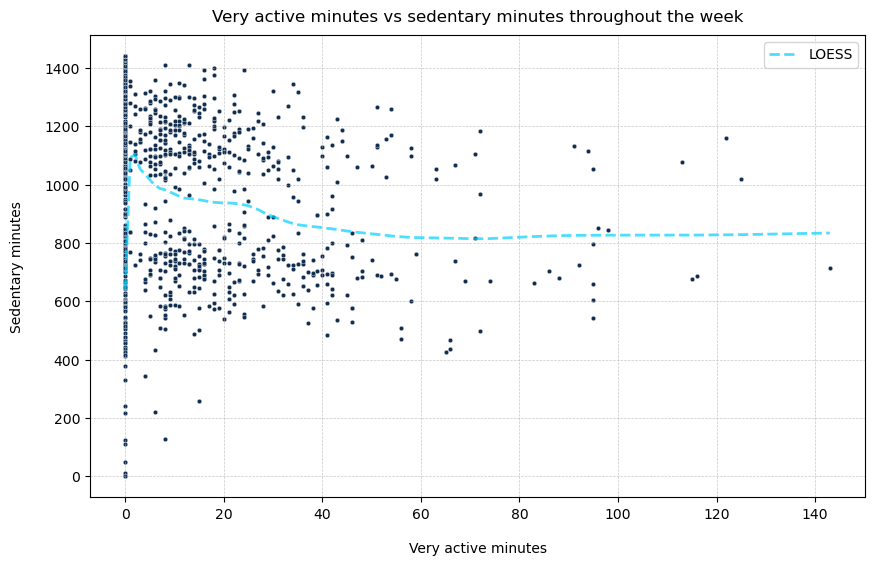

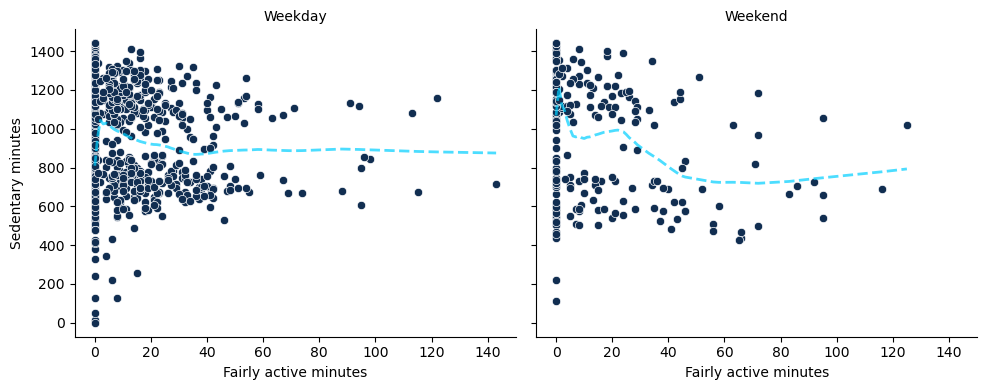

In [37]:
# Create the main scatterplot
plt.figure(figsize=(10, 6))

# Add grey jitter points (valid color code for light grey)
sns.scatterplot(
    x=dd02_A['fairly_active_minutes'],
    y=dd02_A['sedentary_minutes'],
    color="#B3B3B3",  # Light grey
    alpha=0.5,
    edgecolor=None,
    s=10
)

# Add the blue jitter points
sns.scatterplot(
    x=daily_df['fairly_active_minutes'],
    y=daily_df['sedentary_minutes'],
    color="#112E51",
    s=10
)

# Compute LOESS smoothed values
loess_smoothed = lowess(
    daily_df['sedentary_minutes'], 
    daily_df['fairly_active_minutes'], 
    frac=0.3  # Adjust the smoothing parameter (0.3 is typical)
)

# Plot LOESS line
plt.plot(
    loess_smoothed[:, 0],  # x values
    loess_smoothed[:, 1],  # y values
    color="#00CFFF",
    linestyle="dashed",
    linewidth=2,
    alpha=0.7,
    label="LOESS"
)

# Apply theme and finalize plot
ax = plt.gca()
apply_theme(ax)
plt.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend()

# Facet grid for week_type with LOESS
g = sns.FacetGrid(daily_df, col='week_type', col_wrap=4, height=4, aspect=1.2)

def add_loess(data, color, **kwargs):
    # Compute LOESS for each facet
    loess_smoothed = lowess(
        data['sedentary_minutes'], 
        data['fairly_active_minutes'], 
        frac=0.3
    )
    plt.plot(
        loess_smoothed[:, 0],
        loess_smoothed[:, 1],
        color="#00CFFF",
        linestyle="dashed",
        linewidth=2,
        alpha=0.7
    )

# Map scatterplot and LOESS onto FacetGrid
g.map(
    sns.scatterplot,
    "fairly_active_minutes",
    "sedentary_minutes",
    color="#112E51"
)
g.map_dataframe(add_loess)

# Set axis labels and titles
g.set_axis_labels("Fairly active minutes", "Sedentary minutes")
g.set_titles("{col_name}")
g.fig.tight_layout()

# Show the plots
plt.show()


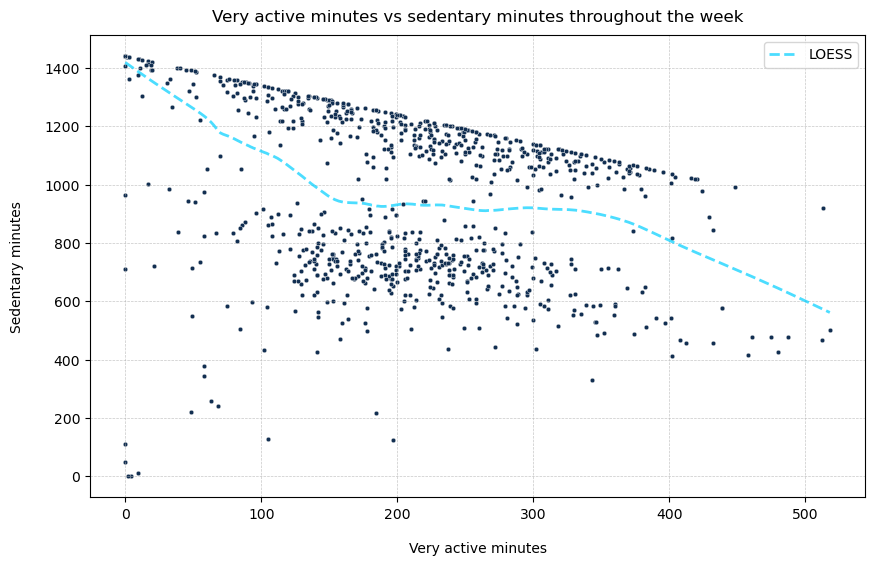

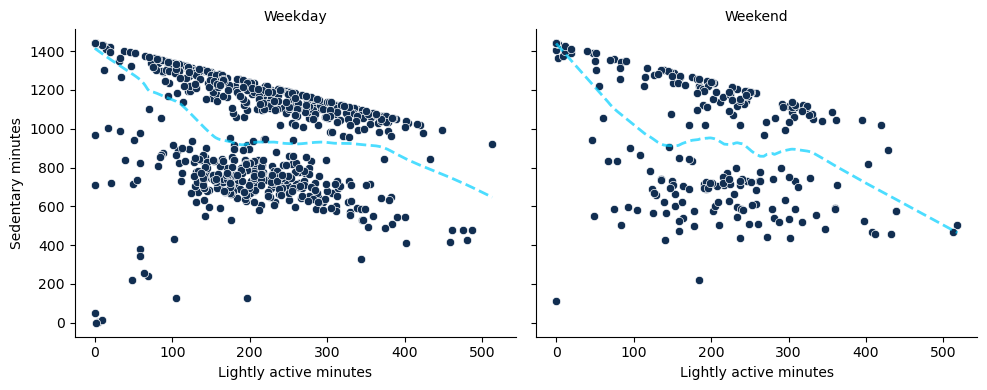

In [38]:
# Create the main scatterplot
plt.figure(figsize=(10, 6))

# Add grey jitter points (valid color code for light grey)
sns.scatterplot(
    x=dd02_A['lightly_active_minutes'],
    y=dd02_A['sedentary_minutes'],
    color="#B3B3B3",  # Light grey
    alpha=0.5,
    edgecolor=None,
    s=10
)

# Add the blue jitter points
sns.scatterplot(
    x=daily_df['lightly_active_minutes'],
    y=daily_df['sedentary_minutes'],
    color="#112E51",
    s=10
)

# Compute LOESS smoothed values
loess_smoothed = lowess(
    daily_df['sedentary_minutes'], 
    daily_df['lightly_active_minutes'], 
    frac=0.3  # Adjust the smoothing parameter (0.3 is typical)
)

# Plot LOESS line
plt.plot(
    loess_smoothed[:, 0],  # x values
    loess_smoothed[:, 1],  # y values
    color="#00CFFF",
    linestyle="dashed",
    linewidth=2,
    alpha=0.7,
    label="LOESS"
)

# Apply theme and finalize plot
ax = plt.gca()
apply_theme(ax)
plt.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend()

# Facet grid for week_type with LOESS
g = sns.FacetGrid(daily_df, col='week_type', col_wrap=4, height=4, aspect=1.2)

def add_loess(data, color, **kwargs):
    # Compute LOESS for each facet
    loess_smoothed = lowess(
        data['sedentary_minutes'], 
        data['lightly_active_minutes'], 
        frac=0.3
    )
    plt.plot(
        loess_smoothed[:, 0],
        loess_smoothed[:, 1],
        color="#00CFFF",
        linestyle="dashed",
        linewidth=2,
        alpha=0.7
    )

# Map scatterplot and LOESS onto FacetGrid
g.map(
    sns.scatterplot,
    "lightly_active_minutes",
    "sedentary_minutes",
    color="#112E51"
)
g.map_dataframe(add_loess)

# Set axis labels and titles
g.set_axis_labels("Lightly active minutes", "Sedentary minutes")
g.set_titles("{col_name}")
g.fig.tight_layout()

# Show the plots
plt.show()



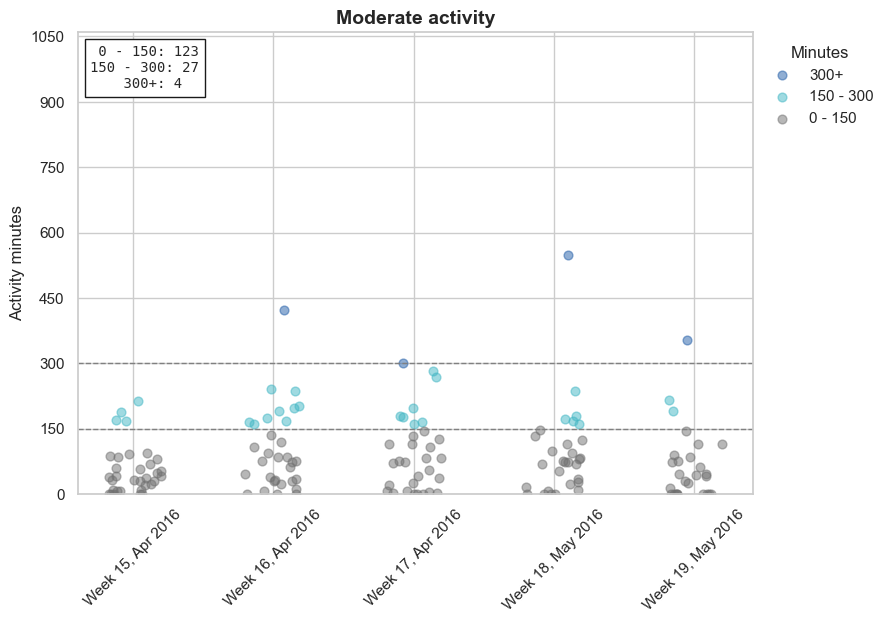

In [39]:
# Ensure 'week_number' is categorical
weekly_data['numeric_week_number'] = pd.Categorical(weekly_data['week_number'].astype(str)).codes + 1

# Extract unique week labels
labels_wmy = sorted(weekly_data['week_number'].unique())

# Categorize weekly moderate activity levels
weekly_data['category'] = np.select(
    [
        weekly_data['weekly_moderate_m'] >= 300,
        (weekly_data['weekly_moderate_m'] >= 150) & (weekly_data['weekly_moderate_m'] < 300),
        weekly_data['weekly_moderate_m'] < 150,
    ],
    ["300+", "150 - 300", "0 - 150"],
    default="Other"
)

# Create summary table
weekly_moderate_150_300_table = weekly_data['category'].value_counts().reset_index()
weekly_moderate_150_300_table.columns = ['Range', 'Count']

# Order categories properly
category_order = ["0 - 150", "150 - 300", "300+"]
weekly_moderate_150_300_table["Range"] = pd.Categorical(weekly_moderate_150_300_table["Range"], categories=category_order, ordered=True)
weekly_moderate_150_300_table = weekly_moderate_150_300_table.sort_values(by="Range")

# Set up plot
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid", context="notebook")

# Define color palette
palette = {"300+": "#225ea8", "150 - 300": "#41b6c4", "0 - 150": "#707070"}

# Scatter plot with jitter
for category, color in palette.items():
    subset = weekly_data[weekly_data['category'] == category]
    jitter = np.random.uniform(-0.2, 0.2, size=len(subset))
    plt.scatter(
        subset['numeric_week_number'] + jitter,
        subset['weekly_moderate_m'],
        label=category,
        color=color,
        alpha=0.5,
        s=40
    )

# Add horizontal dashed lines
plt.axhline(y=150, color='grey', linestyle='dashed', linewidth=1)
plt.axhline(y=300, color='grey', linestyle='dashed', linewidth=1)

# Customize x-axis and y-axis
plt.xticks(ticks=np.arange(1, len(labels_wmy) + 1), labels=labels_wmy, rotation=45)
plt.yticks(np.arange(0, 1100, 150))
plt.ylim(0, 1060)

# Add labels and title
plt.title("Moderate activity", fontsize=14, fontweight='bold', loc='center')
# plt.suptitle("(minutes per week)", fontsize=10, fontstyle='italic', x=0.5, y=0.92)
plt.xlabel("")
plt.ylabel("Activity minutes", fontsize=12)

# Add legend
plt.legend(title="Minutes", loc="upper left", bbox_to_anchor=(1, 1), frameon=False)

# Add summary table
table_text = '\n'.join(f"{row['Range']:>8}: {row['Count']}" for _, row in weekly_moderate_150_300_table.iterrows())
anchored_text = AnchoredText(
    table_text, loc='upper left', prop=dict(size=10, family='monospace')
)
plt.gca().add_artist(anchored_text)

# Adjust margins
plt.subplots_adjust(right=0.8)

# Show plot
plt.show()


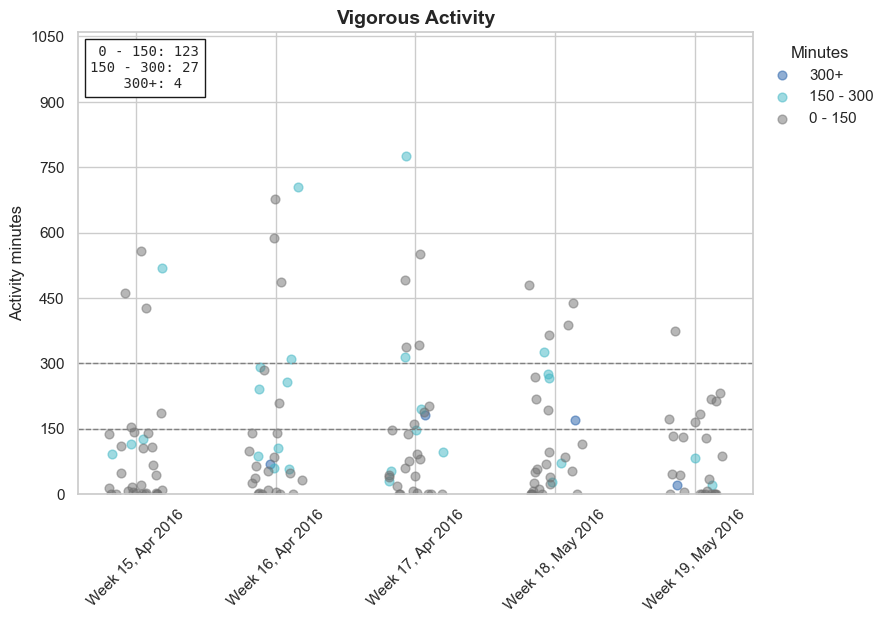

In [40]:
# Create a summary table for the activity categories
weekly_vigorous_150_300_table = weekly_data['category'].value_counts().reset_index()
weekly_vigorous_150_300_table.columns = ['Range', 'Count']

# Sort table
category_order = ["0 - 150", "150 - 300", "300+"]
weekly_vigorous_150_300_table["Range"] = pd.Categorical(weekly_vigorous_150_300_table["Range"], categories=category_order, ordered=True)
weekly_vigorous_150_300_table = weekly_vigorous_150_300_table.sort_values(by="Range")

# Set up the plot
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid", context="notebook")

# Define color palette
palette = {"300+": "#225ea8", "150 - 300": "#41b6c4", "0 - 150": "#707070"}

# Add scatter points with jitter
for category, color in palette.items():
    subset = weekly_data[weekly_data['category'] == category]
    jitter = np.random.uniform(-0.2, 0.2, size=len(subset))
    plt.scatter(
        subset['numeric_week_number'] + jitter,
        subset['weekly_vigorous_m'],
        label=category,
        color=color,
        alpha=0.5,
        s=40
    )

# Add horizontal dashed lines at 150 and 300
plt.axhline(y=150, color='grey', linestyle='dashed', linewidth=1)
plt.axhline(y=300, color='grey', linestyle='dashed', linewidth=1)

# Customize x-axis and y-axis
plt.xticks(ticks=np.arange(1, len(labels_wmy) + 1), labels=labels_wmy, rotation=45)
plt.yticks(np.arange(0, 1100, 150))
plt.ylim(0, 1060)

# Add labels and title
plt.title("Vigorous Activity", fontsize=14, fontweight='bold', loc='center')
# plt.suptitle("(minutes per week)", fontsize=10, fontstyle='italic', x=0.5, y=0.92)
plt.xlabel("")
plt.ylabel("Activity minutes", fontsize=12)

# Add legend
plt.legend(title="Minutes", loc="upper left", bbox_to_anchor=(1, 1), frameon=False)

# Add summary table
table_text = '\n'.join(f"{row['Range']:>8}: {row['Count']}" for _, row in weekly_vigorous_150_300_table.iterrows())
anchored_text = AnchoredText(
    table_text, loc='upper left', prop=dict(size=10, family='monospace')
)
plt.gca().add_artist(anchored_text)

# Adjust plot margins
plt.subplots_adjust(right=0.8)

# Show the plot
plt.show()


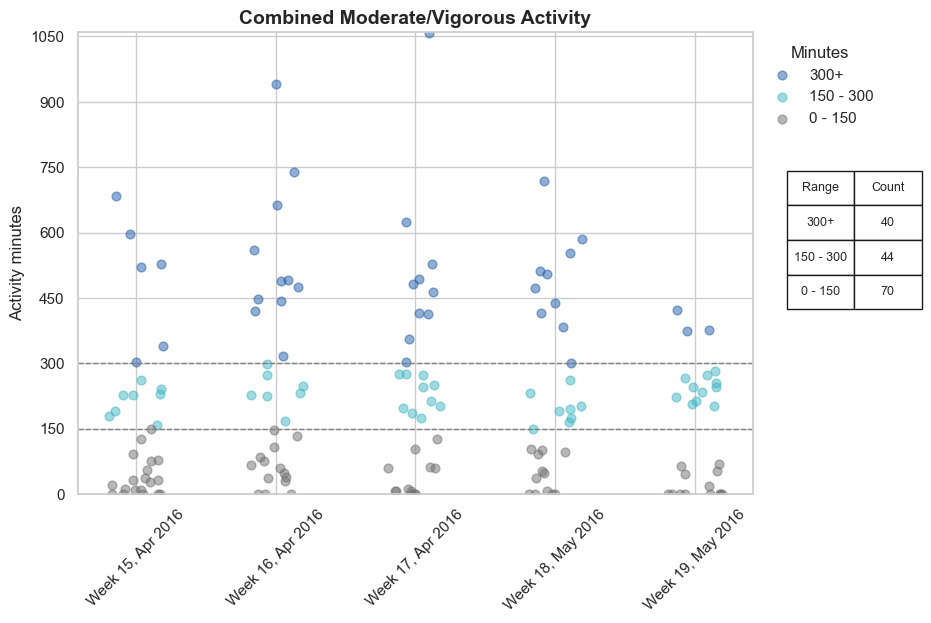

In [41]:
# Ensure 'week_number' is categorical
weekly_data['numeric_week_number'] = pd.Categorical(weekly_data['week_number'].astype(str)).codes + 1

# Create labels for week-month-year
labels_wmy = sorted(weekly_data['week_number'].unique())

# Categorize weekly moderate + vigorous activity levels
weekly_moderate_vigorous_150_300_table = pd.DataFrame({
    "Range": ["300+", "150 - 300", "0 - 150"],
    "Count": [
        len(weekly_data[weekly_data['weekly_mod_vig_m'] >= 300]),
        len(weekly_data[(weekly_data['weekly_mod_vig_m'] >= 150) & (weekly_data['weekly_mod_vig_m'] < 300)]),
        len(weekly_data[weekly_data['weekly_mod_vig_m'] < 150])
    ]
})

# Define color palette
palette = {"300+": "#225ea8", "150 - 300": "#41b6c4", "0 - 150": "#707070"}

# Set up plot
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid", context="notebook")

# Scatter plot with jitter
for label, color in palette.items():
    if label == "300+":
        subset = weekly_data[weekly_data['weekly_mod_vig_m'] >= 300]
    elif label == "150 - 300":
        subset = weekly_data[(weekly_data['weekly_mod_vig_m'] >= 150) & (weekly_data['weekly_mod_vig_m'] < 300)]
    elif label == "0 - 150":
        subset = weekly_data[weekly_data['weekly_mod_vig_m'] < 150]
    
    jitter = np.random.uniform(-0.2, 0.2, size=len(subset))
    plt.scatter(
        subset['numeric_week_number'] + jitter,
        subset['weekly_mod_vig_m'],
        label=label,
        color=color,
        alpha=0.5,
        s=40
    )

# Add horizontal dashed lines at 150 and 300
plt.axhline(y=150, color='grey', linestyle='dashed', linewidth=1)
plt.axhline(y=300, color='grey', linestyle='dashed', linewidth=1)

# Customize axes
plt.xticks(ticks=np.arange(1, len(labels_wmy) + 1), labels=labels_wmy, rotation=45)
plt.yticks(np.arange(0, 1100, 150))
plt.ylim(0, 1060)

# Add title and labels
plt.title("Combined Moderate/Vigorous Activity", fontsize=14, fontweight='bold', loc='center')
# plt.suptitle("(minutes per week)", fontsize=10, fontstyle='italic', x=0.5, y=0.92)
plt.ylabel("Activity minutes", fontsize=12)

# Add legend
plt.legend(title="Minutes", loc="upper left", bbox_to_anchor=(1, 1), frameon=False)

# Add summary table to the plot
ax = plt.gca()
table_data = weekly_moderate_vigorous_150_300_table.values

table = plt.table(cellText=table_data,
                  colLabels=["Range", "Count"],
                  cellLoc="center",
                  loc="right",
                  bbox=[1.05, 0.4, 0.2, 0.3])

# Adjust plot margins
plt.subplots_adjust(right=0.8)

# Show plot
plt.show()


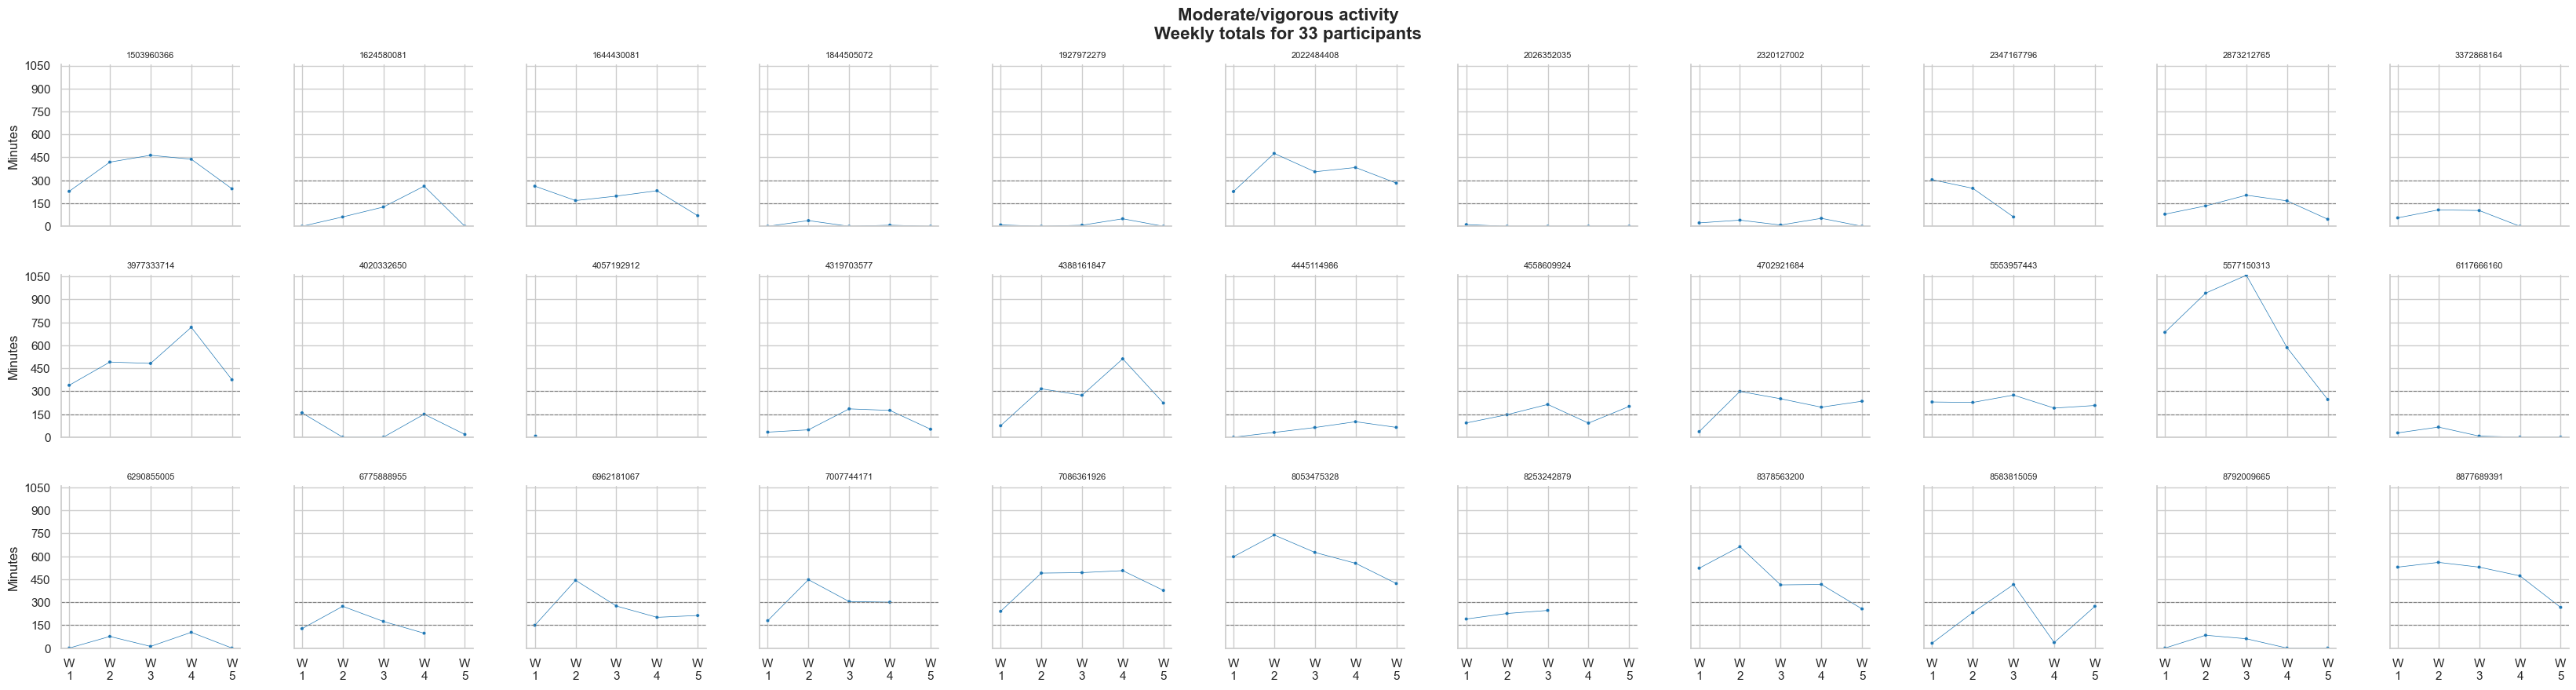

In [42]:
# Define labels and limits for the x-axis
labels_week_n = ["W\n1", "W\n2", "W\n3", "W\n4", "W\n5"]
limits_week_n = [1, 2, 3, 4, 5]  # Numeric week numbers corresponding to the labels

# Set up the plot dimensions
g = sns.FacetGrid(
    weekly_data,
    col="id",
    col_wrap=11,
    height=3,
    aspect=1,
    sharey=True,
    sharex=True
)

# Add line plots for each participant
g.map_dataframe(
    sns.lineplot,
    x="numeric_week_number",
    y="weekly_mod_vig_m",
    hue="id",
    estimator=None,
    lw=0.5,
    palette="tab20",
    legend=False
)

# Add scatter points to the lines
g.map_dataframe(
    sns.scatterplot,
    x="numeric_week_number",
    y="weekly_mod_vig_m",
    hue="id",
    palette="tab20",
    s=10,
    legend=False
)

# Customize the plot
for ax in g.axes.flatten():
    ax.axhline(y=150, color="gray", linestyle="--", linewidth=0.8)
    ax.axhline(y=300, color="gray", linestyle="--", linewidth=0.8)
    ax.set_xticks(limits_week_n)  # Explicitly set x-tick positions
    ax.set_xticklabels(labels_week_n)  # Set corresponding labels

# Adjust y-axis labels and titles
g.set_axis_labels("", "Minutes")
g.set_titles("{col_name}", size=8)

# Add global title and adjust layout
g.fig.suptitle(
    "Moderate/vigorous activity\nWeekly totals for 33 participants",
    fontsize=16,
    fontweight="bold"
)
g.fig.subplots_adjust(top=0.9, hspace=0.3, wspace=0.3)

# Set y-axis ticks and limits
g.set(yticks=np.arange(0, 1100, 150), ylim=(0, 1060))

# Save the plot
# plt.savefig("images/weekly_activity_33.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()


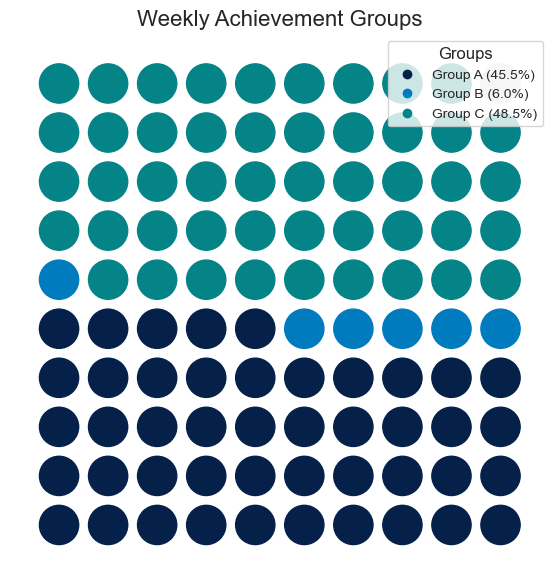

In [43]:
weekly_achievement_groups = {"Group A": 0.455, "Group B": 0.06, "Group C": 0.485}
group_colors = {"Group A": "#052049", "Group B": "#007cbe", "Group C": "#058488"}

# Total icons
n_icons = 100

# Calculate the number of icons for each group
group_counts = {group: int(n_icons * proportion) for group, proportion in weekly_achievement_groups.items()}

# Create a grid
grid_dim = int(np.ceil(np.sqrt(n_icons)))  # Create a square grid
x, y = np.meshgrid(range(grid_dim), range(grid_dim))
x = x.flatten()
y = y.flatten()

# Assign colors to icons
colors = []
for group, count in group_counts.items():
    colors.extend([group_colors[group]] * count)
# Fill remaining spots with a neutral color (optional, if total < n_icons)
colors.extend(["#d3d3d3"] * (n_icons - len(colors)))

# Plot the grid
fig, ax = plt.subplots(figsize=(6, 6))
for i in range(n_icons):
    ax.add_patch(plt.Circle((x[i], y[i]), 0.4, color=colors[i]))

# Format plot
ax.set_xlim(-1, grid_dim)
ax.set_ylim(-1, grid_dim)
ax.set_aspect("equal")
ax.axis("off")

# Add legend
for group, color in group_colors.items():
    ax.plot([], [], color=color, label=f"{group} ({weekly_achievement_groups[group] * 100:.1f}%)", marker="o", linestyle="None")
ax.legend(loc="upper right", title="Groups", fontsize=10)

# Add title
plt.title("Weekly Achievement Groups", fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()


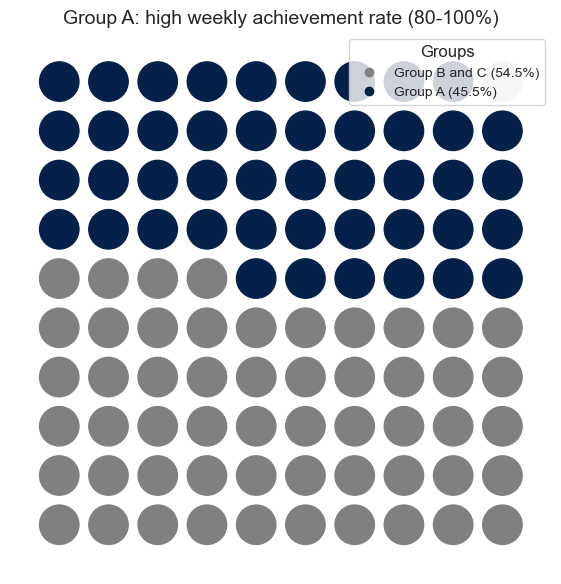

In [44]:
weekly_achievement_group_a = {"Group B and C": 0.545, "Group A": 0.455}
group_colors = {"Group B and C": "grey", "Group A": "#052049"}

# Total icons
n_icons = 100

# Calculate the number of icons for each group
group_counts = {group: int(n_icons * proportion) for group, proportion in weekly_achievement_group_a.items()}

# Create a grid
grid_dim = int(np.ceil(np.sqrt(n_icons)))  # Create a square grid
x, y = np.meshgrid(range(grid_dim), range(grid_dim))
x = x.flatten()
y = y.flatten()

# Assign colors to icons
colors = []
for group, count in group_counts.items():
    colors.extend([group_colors[group]] * count)
# Fill remaining spots with a neutral color (optional, if total < n_icons)
colors.extend(["#d3d3d3"] * (n_icons - len(colors)))

# Plot the grid
fig, ax = plt.subplots(figsize=(6, 6))
for i in range(n_icons):
    ax.add_patch(plt.Circle((x[i], y[i]), 0.4, color=colors[i]))

# Format plot
ax.set_xlim(-1, grid_dim)
ax.set_ylim(-1, grid_dim)
ax.set_aspect("equal")
ax.axis("off")

# Add legend
for group, color in group_colors.items():
    ax.plot([], [], color=color, label=f"{group} ({weekly_achievement_group_a[group] * 100:.1f}%)", marker="o", linestyle="None")
ax.legend(loc="upper right", title="Groups", fontsize=10)

# Add title
plt.title("Group A: high weekly achievement rate (80-100%)", fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


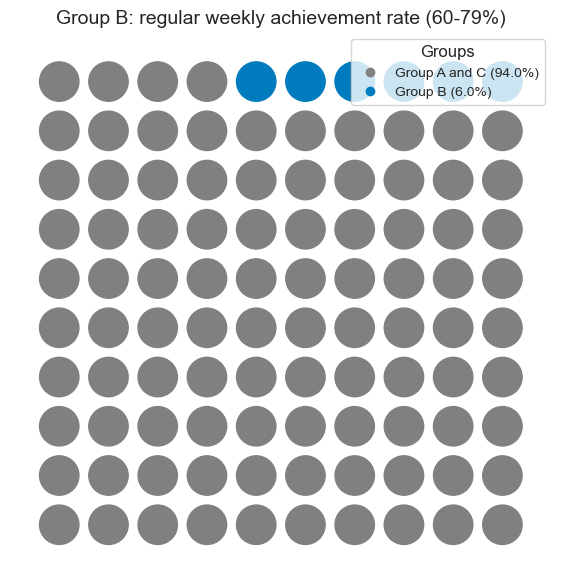

In [45]:
weekly_achievement_group_b = {"Group A and C": 0.94, "Group B": 0.06}
group_colors = {"Group A and C": "grey", "Group B": "#007cbe"}

# Total icons
n_icons = 100

# Calculate the number of icons for each group
group_counts = {group: int(n_icons * proportion) for group, proportion in weekly_achievement_group_b.items()}

# Create a grid
grid_dim = int(np.ceil(np.sqrt(n_icons)))  # Create a square grid
x, y = np.meshgrid(range(grid_dim), range(grid_dim))
x = x.flatten()
y = y.flatten()

# Assign colors to icons
colors = []
for group, count in group_counts.items():
    colors.extend([group_colors[group]] * count)
# Fill remaining spots with a neutral color (optional, if total < n_icons)
colors.extend(["#d3d3d3"] * (n_icons - len(colors)))

# Plot the grid
fig, ax = plt.subplots(figsize=(6, 6))
for i in range(n_icons):
    ax.add_patch(plt.Circle((x[i], y[i]), 0.4, color=colors[i]))

# Format plot
ax.set_xlim(-1, grid_dim)
ax.set_ylim(-1, grid_dim)
ax.set_aspect("equal")
ax.axis("off")

# Add legend
for group, color in group_colors.items():
    ax.plot([], [], color=color, label=f"{group} ({weekly_achievement_group_b[group] * 100:.1f}%)", marker="o", linestyle="None")
ax.legend(loc="upper right", title="Groups", fontsize=10)

# Add title
plt.title("Group B: regular weekly achievement rate (60-79%)", fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


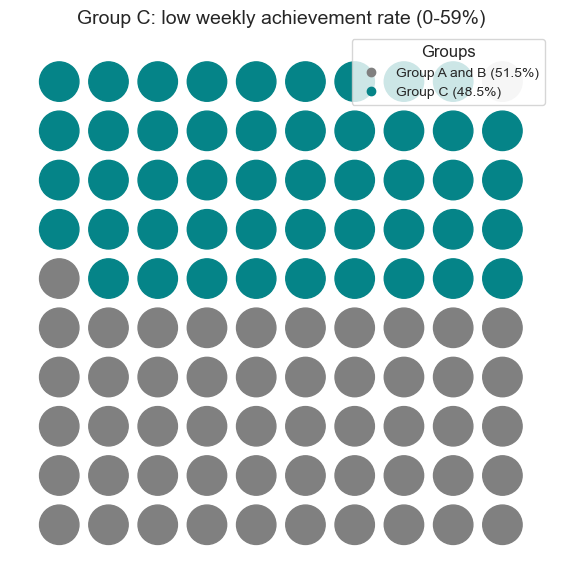

In [46]:
weekly_achievement_group_c = {"Group A and B": 0.515, "Group C": 0.485}
group_colors = {"Group A and B": "grey", "Group C": "#058488"}

# Total icons
n_icons = 100

# Calculate the number of icons for each group
group_counts = {group: int(n_icons * proportion) for group, proportion in weekly_achievement_group_c.items()}

# Create a grid
grid_dim = int(np.ceil(np.sqrt(n_icons)))  # Create a square grid
x, y = np.meshgrid(range(grid_dim), range(grid_dim))
x = x.flatten()
y = y.flatten()

# Assign colors to icons
colors = []
for group, count in group_counts.items():
    colors.extend([group_colors[group]] * count)
# Fill remaining spots with a neutral color (optional, if total < n_icons)
colors.extend(["#d3d3d3"] * (n_icons - len(colors)))

# Plot the grid
fig, ax = plt.subplots(figsize=(6, 6))
for i in range(n_icons):
    ax.add_patch(plt.Circle((x[i], y[i]), 0.4, color=colors[i]))

# Format plot
ax.set_xlim(-1, grid_dim)
ax.set_ylim(-1, grid_dim)
ax.set_aspect("equal")
ax.axis("off")

# Add legend
for group, color in group_colors.items():
    ax.plot([], [], color=color, label=f"{group} ({weekly_achievement_group_c[group] * 100:.1f}%)", marker="o", linestyle="None")
ax.legend(loc="upper right", title="Groups", fontsize=10)

# Add title
plt.title("Group C: low weekly achievement rate (0-59%)", fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()
